<a href="https://colab.research.google.com/github/hpatel530/Capstone/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification For Autonomous Vehicles 



> Capstone Project
- Student Name: Hiten Patel 
- Student email: h.patel.ms@gmail.com
- Project Link: https://github.com/hpatel530/Capstone
- Student Pace: Full Time Online 
- Project Review: Dec. 17, 2020: 3pm 
- Instructor Name: James Irving 
- Blog Post URL: 

## Abstract 

On average, there are 6 million car accidents in the U.S. every year. That's roughly 16,438 car accidents per day. Of those 6 million car accidents, over 3 million people experience a non-fatal injury and over 37,000 Americans experience death. Over 100 people die per day due to car accidents in any given year. A 2016 study by the National Highway Transportation Safety Administration (NHTSA) found that human error accounts for 96% of all auto accidents.

A self driving car, also known as an autonomous vehicle, is a vehicle that is capable of sensing it's environment and moving safely with no human input. An autonomous vehicle needs sensory input devices like cameras, radars,  and lidars to allow the car to perceive the world around it, creating a digital map. Object detection is a two-part process, image classification and then image localization. Our focus will be image classification, which is determining what the objects in a image are. Is it a car, traffic light, a person or all of the above?

To explore this question, we built a convolutional neural network using the Berkely DeepDrive dataset to create a multi-label model which contains 70,000 training images and 10,000 validation images. 

This multi-label CNN model was responsible in predicting up to 12 labels in any given image. The dataset possesses geographic, environmental and weather diversity which is useful for training models that are less likely to be surprised by new conditions. Image classification labels consist of ['lane', 'drivable area', 'truck', 'motor', 'person', 'rider', 'bike', 'train', 'car', 'traffic light', 'bus', 'traffic sign']. Instead of using accuracy as our primary indicator on how well a model performs, we used Hamming Loss. The Hamming Loss function takes the number of incorrect labels predicted and divides it by the total number of labels. The lower the number (closer to 0), the better the model performed. The final cnn model produced a hamming score of 11%, which can be interpretated as 89% percent correctly predicted labels.






## Business Case 

On average, there are 6 million car accidents in the U.S. every year. That's roughly 16,438 car accidents per day. Of those 6 million car accidents, over 3 million people experience a non-fatal injury and over 37,000 Americans experience death. Over 100 people die per day due to car accidents in any given year. A 2016 study by the National Highway Transportation Safety Administration (NHTSA) found that human error accounts for 96% of all auto accidents. The goal is to produce an image classification model to help create a self driving electric vehicle to help reduce car accidents and mitigate carbon dioxide.

## Data

The data used in this project was obtained by:


*   [Berkley Deep Drive ](https://bdd-data.berkeley.edu/)
  * Click on download

The dataset contains over 100,000 images and 100,000 videos. For this project, we used the images only. The dataset possesses geographic, environmental and weather diversity which is useful for training models. 

>**Citations:**
@InProceedings{bdd100k,
    author = {Yu, Fisher and Chen, Haofeng and Wang, Xin and Xian, Wenqi and Chen,
              Yingying and Liu, Fangchen and Madhavan, Vashisht and Darrell, Trevor},
    title = {BDD100K: A Diverse Driving Dataset for Heterogeneous Multitask Learning},
    booktitle = {The IEEE Conference on Computer Vision and Pattern Recognition (CVPR)},
    month = {June},
    year = {2020}
}






# Obtain

## Import Libraries and Packages

In [1]:
#Mount Google Drive
from google.colab import drive
drive.mount('/gdrive',force_remount=True) 

Mounted at /gdrive


In [2]:
#import numpy, pandas, seaborn, matplotlib 

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#random seed for reproducibility 
np.random.seed(123)

In [3]:
import os, sys, glob
import PIL
import PIL.Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

#importing sklearn package
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

#Importing tensorflow,keras libraries, packages and tools
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import callbacks, models, layers, optimizers, regularizers

import tensorflow_addons as tfa
from tensorflow.keras.metrics import Metric
tf.random.set_seed(123)

#Install and Import LIME 
#!pip install lime

print(tf.__version__)

2.4.0


## Importing Images Zip File

### Locating File Path 

In [4]:
def print_dir_contents(fpath=None):
    """
    Function to print the contents of the filepath provided. Defaults to the 
    current directory.

    Parameters:
    ----------
        fpath: str, file path of directory 

    Returns:
    -------
        prints content of folder 
    """
    
    if fpath is None:
        fpath = os.path.abspath(os.curdir)

    print(f"CONTENTS OF FOLDER: '{fpath}':")
    files = sorted(os.listdir(fpath))
    tab = '\n\t'
    print("\t"+tab.join(files))

In [5]:
source_folder = r'/gdrive/My Drive/'
print(print_dir_contents(source_folder))

ZIPFILE_STR = 'bdd100k_images.zip'

files = source_folder+ZIPFILE_STR
print(files)

CONTENTS OF FOLDER: '/gdrive/My Drive/':
	Colab Notebooks
	Image Classification Models
	Motel Notes .gdoc
	bdd100k_images.zip
	bdd100k_labels_release.zip
	selfdrivingreadme.jpeg
None
/gdrive/My Drive/bdd100k_images.zip


### Unzip Files

In [6]:
#cell takes 6 minutes to run 
zip_path = "/gdrive/My Drive/bdd100k_images.zip"
fname = 'bdd100k_images.zip'

#Get the name of the zipfile without folder
#zip_path = source_file
#fname = zip_path.split('/')[-1]

!cp "{zip_path}" .

!unzip -q "{fname}" 
!rm "{fname}" 

bdd100k/images/100k/test/dc4ff24f-118dcbee.jpg  bad CRC 94d144d9  (should be 79e95ec3)
file #6968:  bad zipfile offset (local header sig):  402838853
file #6969:  bad zipfile offset (local header sig):  402866745
file #6970:  bad zipfile offset (local header sig):  402895359
bdd100k/images/100k/test/ee23ecc7-f4b01834.jpg  bad CRC 2a88d713  (should be 61f4cc0d)
file #13920:  bad zipfile offset (local header sig):  805705891
file #13921:  bad zipfile offset (local header sig):  805739015
file #13922:  bad zipfile offset (local header sig):  805792837


### Locating Files/Creating Folders

In [7]:
#using function to locate unzipped files 
print_dir_contents()

CONTENTS OF FOLDER: '/content':
	.config
	bdd100k
	sample_data


In [8]:
#observing folders within base_folder
base_folder = 'bdd100k/'

print(print_dir_contents(base_folder))
print("-------------------")
print(print_dir_contents('bdd100k/images/'))
print("-------------------")

CONTENTS OF FOLDER: 'bdd100k/':
	images
None
-------------------
CONTENTS OF FOLDER: 'bdd100k/images/':
	100k
	10k
None
-------------------


In [9]:
#observing folders within 100k folder and 10k folder 
print(print_dir_contents('bdd100k/images/100k'))
print("-------------------")
print_dir_contents('bdd100k/images/10k')

CONTENTS OF FOLDER: 'bdd100k/images/100k':
	test
	train
	val
None
-------------------
CONTENTS OF FOLDER: 'bdd100k/images/10k':
	test
	train
	val


**Images has two subfolders. 1) 100K labeled key frame images extracted from the videos at 10th second 2) 10K key frames for full-frame semantic segmentation. We will be using the files from the 100k folder**

In [10]:
#100k folder will be used for this project
#creating folder names with file paths 
train_folder = 'bdd100k/images/100k/train'
val_folder = 'bdd100k/images/100k/val'
test_folder = 'bdd100k/images/100k/test'

#number of files per folder 
print('Train Folder:',len(os.listdir(train_folder)))
print('Validation Folder:',len(os.listdir(val_folder)))
print('Test Folder:', len(os.listdir(test_folder)))

Train Folder: 70000
Validation Folder: 10000
Test Folder: 19994


## Importing Labels Zip File 

### Locating File Path 

In [11]:
ZIPFILE_STR_1 = 'bdd100k_labels_release.zip'
files = source_folder+ZIPFILE_STR_1
print(files)

/gdrive/My Drive/bdd100k_labels_release.zip


### Unzip Files

In [12]:
zip_path_1 = "/gdrive/My Drive/bdd100k_labels_release.zip"
fname = 'bdd100k_labels_release.zip'

#Get the name of the zipfile without folder
#zip_path = source_file
#fname = zip_path.split('/')[-1]

!cp "{zip_path_1}" .

!unzip -q "{fname}" 
!rm "{fname}"

### Label Train Dataframe  

In [13]:
#observing the first five rows of train dataframe  
df_train = pd.read_json('/content/bdd100k/labels/bdd100k_labels_images_train.json')
df_train.head()

,name,attributes,timestamp,labels
0,0000f77c-6257be58.jpg,"{'weather': 'clear', 'scene': 'city street', '...",10000,"[{'category': 'traffic light', 'attributes': {..."
1,0000f77c-62c2a288.jpg,"{'weather': 'clear', 'scene': 'highway', 'time...",10000,"[{'category': 'traffic sign', 'attributes': {'..."
2,0000f77c-cb820c98.jpg,"{'weather': 'clear', 'scene': 'residential', '...",10000,"[{'category': 'car', 'attributes': {'occluded'..."
3,0001542f-5ce3cf52.jpg,"{'weather': 'clear', 'scene': 'city street', '...",10000,"[{'category': 'traffic sign', 'attributes': {'..."
4,0001542f-7c670be8.jpg,"{'weather': 'clear', 'scene': 'highway', 'time...",10000,"[{'category': 'car', 'attributes': {'occluded'..."


### Label Validation Dataframe 

In [14]:
#observing the first five rows of val dataframe 
df_val = pd.read_json('/content/bdd100k/labels/bdd100k_labels_images_val.json')
df_val.head()

,name,attributes,timestamp,labels
0,b1c66a42-6f7d68ca.jpg,"{'weather': 'overcast', 'scene': 'city street'...",10000,"[{'category': 'traffic sign', 'attributes': {'..."
1,b1c81faa-3df17267.jpg,"{'weather': 'clear', 'scene': 'highway', 'time...",10000,"[{'category': 'car', 'attributes': {'occluded'..."
2,b1c81faa-c80764c5.jpg,"{'weather': 'clear', 'scene': 'highway', 'time...",10000,"[{'category': 'traffic sign', 'attributes': {'..."
3,b1c9c847-3bda4659.jpg,"{'weather': 'undefined', 'scene': 'city street...",10000,"[{'category': 'traffic sign', 'attributes': {'..."
4,b1ca2e5d-84cf9134.jpg,"{'weather': 'clear', 'scene': 'city street', '...",10000,"[{'category': 'car', 'attributes': {'occluded'..."


# Scrub

## Scrub df_train 

In [15]:
#observing info() on df 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69863 entries, 0 to 69862
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        69863 non-null  object
 1   attributes  69863 non-null  object
 2   timestamp   69863 non-null  int64 
 3   labels      69863 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.1+ MB


In [16]:
#observing first row of labels, 'category' is what we need to extract for our target_list
df_train.labels[0]

[{'attributes': {'occluded': False,
   'trafficLightColor': 'green',
   'truncated': False},
  'box2d': {'x1': 1125.902264,
   'x2': 1156.978645,
   'y1': 133.184488,
   'y2': 210.875445},
  'category': 'traffic light',
  'id': 0,
  'manualAttributes': True,
  'manualShape': True},
 {'attributes': {'occluded': False,
   'trafficLightColor': 'green',
   'truncated': False},
  'box2d': {'x1': 1156.978645,
   'x2': 1191.50796,
   'y1': 136.637417,
   'y2': 210.875443},
  'category': 'traffic light',
  'id': 1,
  'manualAttributes': True,
  'manualShape': True},
 {'attributes': {'occluded': False,
   'trafficLightColor': 'none',
   'truncated': False},
  'box2d': {'x1': 1101.731743,
   'x2': 1170.79037,
   'y1': 211.122087,
   'y2': 233.566141},
  'category': 'traffic sign',
  'id': 2,
  'manualAttributes': True,
  'manualShape': True},
 {'attributes': {'occluded': False,
   'trafficLightColor': 'none',
   'truncated': True},
  'box2d': {'x1': 0, 'x2': 100.381647, 'y1': 0.246631, 'y2': 122

In [17]:
#created function to extract 'category' from labels' column in each row 
def clean_labels(example): 
  """
  Extracting 'category' from each row and adding unique words to a list.

  Parameters:
  ----------
      example: dataframe column map function 
              df['labels'].map(clean_labels)

  Returns:
  -------
      a list of unique words separated by a comma 

  """
  example_df = pd.DataFrame.from_records(example)
  example_df = example_df['category'].unique().tolist()
  return ','.join(example_df)

### Clean Labels

In [18]:
#created a new column which runs the above function on the labels column  
df_train['clean_labels'] = df_train['labels'].map(clean_labels)

In [19]:
#observing df_train with new columm 
df_train

,name,attributes,timestamp,labels,clean_labels
0,0000f77c-6257be58.jpg,"{'weather': 'clear', 'scene': 'city street', '...",10000,"[{'category': 'traffic light', 'attributes': {...","traffic light,traffic sign,car,drivable area,lane"
1,0000f77c-62c2a288.jpg,"{'weather': 'clear', 'scene': 'highway', 'time...",10000,"[{'category': 'traffic sign', 'attributes': {'...","traffic sign,person,drivable area,lane"
2,0000f77c-cb820c98.jpg,"{'weather': 'clear', 'scene': 'residential', '...",10000,"[{'category': 'car', 'attributes': {'occluded'...","car,drivable area,lane"
3,0001542f-5ce3cf52.jpg,"{'weather': 'clear', 'scene': 'city street', '...",10000,"[{'category': 'traffic sign', 'attributes': {'...","traffic sign,traffic light,car,bus,drivable ar..."
4,0001542f-7c670be8.jpg,"{'weather': 'clear', 'scene': 'highway', 'time...",10000,"[{'category': 'car', 'attributes': {'occluded'...","car,person,traffic light,traffic sign,drivable..."
...,...,...,...,...,...
69858,fe172415-3c36f3d1.jpg,"{'weather': 'overcast', 'scene': 'highway', 't...",10000,"[{'category': 'car', 'attributes': {'occluded'...","car,bus,traffic sign,traffic light,person,driv..."
69859,fe189115-11bedd21.jpg,"{'weather': 'partly cloudy', 'scene': 'city st...",10000,"[{'category': 'car', 'attributes': {'occluded'...","car,bus,drivable area,lane"
69860,fe189115-352995ee.jpg,"{'weather': 'undefined', 'scene': 'city street...",10000,"[{'category': 'traffic light', 'attributes': {...","traffic light,car,truck,person,drivable area,lane"
69861,fe189115-354e7981.jpg,"{'weather': 'undefined', 'scene': 'city street...",10000,"[{'category': 'traffic light', 'attributes': {...","traffic light,traffic sign,person,truck,car,bu..."


In [20]:
#create target_list, convert to set, convert to list 
target_list = ",".join(df_train.clean_labels).split(",")
target_list = list(set(target_list))
target_list

['lane',
 'bus',
 'traffic sign',
 'rider',
 'truck',
 'drivable area',
 'bike',
 'motor',
 'car',
 'train',
 'traffic light',
 'person']

### One Hot Encode target_list

In [21]:
#create copy of df, for loop to search if clean_labels contains target_list, convert to int 
data_train = df_train.copy()
for target in target_list:
    data_train[target] = data_train['clean_labels'].str.contains(target)
    data_train[target] = data_train[target].astype(int)

In [22]:
#observing data dataframe, target_list is now one hot encoded 
data_train

,name,attributes,timestamp,labels,clean_labels,lane,bus,traffic sign,rider,truck,drivable area,bike,motor,car,train,traffic light,person
0,0000f77c-6257be58.jpg,"{'weather': 'clear', 'scene': 'city street', '...",10000,"[{'category': 'traffic light', 'attributes': {...","traffic light,traffic sign,car,drivable area,lane",1,0,1,0,0,1,0,0,1,0,1,0
1,0000f77c-62c2a288.jpg,"{'weather': 'clear', 'scene': 'highway', 'time...",10000,"[{'category': 'traffic sign', 'attributes': {'...","traffic sign,person,drivable area,lane",1,0,1,0,0,1,0,0,0,0,0,1
2,0000f77c-cb820c98.jpg,"{'weather': 'clear', 'scene': 'residential', '...",10000,"[{'category': 'car', 'attributes': {'occluded'...","car,drivable area,lane",1,0,0,0,0,1,0,0,1,0,0,0
3,0001542f-5ce3cf52.jpg,"{'weather': 'clear', 'scene': 'city street', '...",10000,"[{'category': 'traffic sign', 'attributes': {'...","traffic sign,traffic light,car,bus,drivable ar...",1,1,1,0,0,1,0,0,1,0,1,0
4,0001542f-7c670be8.jpg,"{'weather': 'clear', 'scene': 'highway', 'time...",10000,"[{'category': 'car', 'attributes': {'occluded'...","car,person,traffic light,traffic sign,drivable...",1,0,1,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69858,fe172415-3c36f3d1.jpg,"{'weather': 'overcast', 'scene': 'highway', 't...",10000,"[{'category': 'car', 'attributes': {'occluded'...","car,bus,traffic sign,traffic light,person,driv...",1,1,1,0,0,1,0,0,1,0,1,1
69859,fe189115-11bedd21.jpg,"{'weather': 'partly cloudy', 'scene': 'city st...",10000,"[{'category': 'car', 'attributes': {'occluded'...","car,bus,drivable area,lane",1,1,0,0,0,1,0,0,1,0,0,0
69860,fe189115-352995ee.jpg,"{'weather': 'undefined', 'scene': 'city street...",10000,"[{'category': 'traffic light', 'attributes': {...","traffic light,car,truck,person,drivable area,lane",1,0,0,0,1,1,0,0,1,0,1,1
69861,fe189115-354e7981.jpg,"{'weather': 'undefined', 'scene': 'city street...",10000,"[{'category': 'traffic light', 'attributes': {...","traffic light,traffic sign,person,truck,car,bu...",1,1,1,0,1,1,1,0,1,0,1,1


### Drop Columns 

In [23]:
#drop attributes and timestamp columns, not neccessary for our model 
columns = ['attributes', 'timestamp']
data_train = data_train.drop(columns = columns)

#review columns have been dropped 
data_train 

,name,labels,clean_labels,lane,bus,traffic sign,rider,truck,drivable area,bike,motor,car,train,traffic light,person
0,0000f77c-6257be58.jpg,"[{'category': 'traffic light', 'attributes': {...","traffic light,traffic sign,car,drivable area,lane",1,0,1,0,0,1,0,0,1,0,1,0
1,0000f77c-62c2a288.jpg,"[{'category': 'traffic sign', 'attributes': {'...","traffic sign,person,drivable area,lane",1,0,1,0,0,1,0,0,0,0,0,1
2,0000f77c-cb820c98.jpg,"[{'category': 'car', 'attributes': {'occluded'...","car,drivable area,lane",1,0,0,0,0,1,0,0,1,0,0,0
3,0001542f-5ce3cf52.jpg,"[{'category': 'traffic sign', 'attributes': {'...","traffic sign,traffic light,car,bus,drivable ar...",1,1,1,0,0,1,0,0,1,0,1,0
4,0001542f-7c670be8.jpg,"[{'category': 'car', 'attributes': {'occluded'...","car,person,traffic light,traffic sign,drivable...",1,0,1,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69858,fe172415-3c36f3d1.jpg,"[{'category': 'car', 'attributes': {'occluded'...","car,bus,traffic sign,traffic light,person,driv...",1,1,1,0,0,1,0,0,1,0,1,1
69859,fe189115-11bedd21.jpg,"[{'category': 'car', 'attributes': {'occluded'...","car,bus,drivable area,lane",1,1,0,0,0,1,0,0,1,0,0,0
69860,fe189115-352995ee.jpg,"[{'category': 'traffic light', 'attributes': {...","traffic light,car,truck,person,drivable area,lane",1,0,0,0,1,1,0,0,1,0,1,1
69861,fe189115-354e7981.jpg,"[{'category': 'traffic light', 'attributes': {...","traffic light,traffic sign,person,truck,car,bu...",1,1,1,0,1,1,1,0,1,0,1,1


## Scrub df_val

In [24]:
df_val.head()

,name,attributes,timestamp,labels
0,b1c66a42-6f7d68ca.jpg,"{'weather': 'overcast', 'scene': 'city street'...",10000,"[{'category': 'traffic sign', 'attributes': {'..."
1,b1c81faa-3df17267.jpg,"{'weather': 'clear', 'scene': 'highway', 'time...",10000,"[{'category': 'car', 'attributes': {'occluded'..."
2,b1c81faa-c80764c5.jpg,"{'weather': 'clear', 'scene': 'highway', 'time...",10000,"[{'category': 'traffic sign', 'attributes': {'..."
3,b1c9c847-3bda4659.jpg,"{'weather': 'undefined', 'scene': 'city street...",10000,"[{'category': 'traffic sign', 'attributes': {'..."
4,b1ca2e5d-84cf9134.jpg,"{'weather': 'clear', 'scene': 'city street', '...",10000,"[{'category': 'car', 'attributes': {'occluded'..."


In [25]:
#observing info()
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        10000 non-null  object
 1   attributes  10000 non-null  object
 2   timestamp   10000 non-null  int64 
 3   labels      10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


### Clean Labels

In [26]:
#created a new column which runs the clean_labels function on the labels column 
df_val['clean_labels'] = df_val['labels'].map(clean_labels)

In [27]:
#create target_list, convert to set, convert to list 
target_list = ",".join(df_val.clean_labels).split(",")
target_list = list(set(target_list))
target_list

['lane',
 'rider',
 'traffic sign',
 'bus',
 'truck',
 'drivable area',
 'motor',
 'bike',
 'car',
 'train',
 'traffic light',
 'person']

### One Hot Encode target_list

In [28]:
#create copy of df_val, for loop to search if clean_labels contains target_list, convert to int
data_val = df_val.copy()
for target in target_list:
    data_val[target] = data_val['clean_labels'].str.contains(target)
    data_val[target] = data_val[target].astype(int)

In [29]:
#observing data_val dataframe, target_list is now one hot encoded 
data_val

,name,attributes,timestamp,labels,clean_labels,lane,rider,traffic sign,bus,truck,drivable area,motor,bike,car,train,traffic light,person
0,b1c66a42-6f7d68ca.jpg,"{'weather': 'overcast', 'scene': 'city street'...",10000,"[{'category': 'traffic sign', 'attributes': {'...","traffic sign,traffic light,car,rider,motor,dri...",1,1,1,0,0,1,1,0,1,0,1,0
1,b1c81faa-3df17267.jpg,"{'weather': 'clear', 'scene': 'highway', 'time...",10000,"[{'category': 'car', 'attributes': {'occluded'...","car,traffic sign,traffic light,drivable area,lane",1,0,1,0,0,1,0,0,1,0,1,0
2,b1c81faa-c80764c5.jpg,"{'weather': 'clear', 'scene': 'highway', 'time...",10000,"[{'category': 'traffic sign', 'attributes': {'...","traffic sign,car,drivable area,lane",1,0,1,0,0,1,0,0,1,0,0,0
3,b1c9c847-3bda4659.jpg,"{'weather': 'undefined', 'scene': 'city street...",10000,"[{'category': 'traffic sign', 'attributes': {'...","traffic sign,car,drivable area,lane",1,0,1,0,0,1,0,0,1,0,0,0
4,b1ca2e5d-84cf9134.jpg,"{'weather': 'clear', 'scene': 'city street', '...",10000,"[{'category': 'car', 'attributes': {'occluded'...","car,person,traffic light,traffic sign,drivable...",1,0,1,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,fe1d9184-d144106a.jpg,"{'weather': 'clear', 'scene': 'city street', '...",10000,"[{'category': 'car', 'attributes': {'occluded'...","car,bus,rider,motor,drivable area,lane",1,1,0,1,0,1,1,0,1,0,0,0
9996,fe1d9184-dec09b65.jpg,"{'weather': 'overcast', 'scene': 'city street'...",10000,"[{'category': 'car', 'attributes': {'occluded'...","car,traffic light,traffic sign,drivable area,lane",1,0,1,0,0,1,0,0,1,0,1,0
9997,fe1f2409-5b415eb7.jpg,"{'weather': 'clear', 'scene': 'residential', '...",10000,"[{'category': 'traffic sign', 'attributes': {'...","traffic sign,person,car,drivable area,lane",1,0,1,0,0,1,0,0,1,0,0,1
9998,fe1f2409-c16ea1ed.jpg,"{'weather': 'clear', 'scene': 'city street', '...",10000,"[{'category': 'traffic sign', 'attributes': {'...","traffic sign,traffic light,person,car,drivable...",1,0,1,0,0,1,0,0,1,0,1,1


### Drop Columns 

In [30]:
#drop attributes and timestamp columns, not neccessary for our model 
columns = ['attributes', 'timestamp']
data_val = data_val.drop(columns = columns)

#review columns have been dropped 
data_val

,name,labels,clean_labels,lane,rider,traffic sign,bus,truck,drivable area,motor,bike,car,train,traffic light,person
0,b1c66a42-6f7d68ca.jpg,"[{'category': 'traffic sign', 'attributes': {'...","traffic sign,traffic light,car,rider,motor,dri...",1,1,1,0,0,1,1,0,1,0,1,0
1,b1c81faa-3df17267.jpg,"[{'category': 'car', 'attributes': {'occluded'...","car,traffic sign,traffic light,drivable area,lane",1,0,1,0,0,1,0,0,1,0,1,0
2,b1c81faa-c80764c5.jpg,"[{'category': 'traffic sign', 'attributes': {'...","traffic sign,car,drivable area,lane",1,0,1,0,0,1,0,0,1,0,0,0
3,b1c9c847-3bda4659.jpg,"[{'category': 'traffic sign', 'attributes': {'...","traffic sign,car,drivable area,lane",1,0,1,0,0,1,0,0,1,0,0,0
4,b1ca2e5d-84cf9134.jpg,"[{'category': 'car', 'attributes': {'occluded'...","car,person,traffic light,traffic sign,drivable...",1,0,1,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,fe1d9184-d144106a.jpg,"[{'category': 'car', 'attributes': {'occluded'...","car,bus,rider,motor,drivable area,lane",1,1,0,1,0,1,1,0,1,0,0,0
9996,fe1d9184-dec09b65.jpg,"[{'category': 'car', 'attributes': {'occluded'...","car,traffic light,traffic sign,drivable area,lane",1,0,1,0,0,1,0,0,1,0,1,0
9997,fe1f2409-5b415eb7.jpg,"[{'category': 'traffic sign', 'attributes': {'...","traffic sign,person,car,drivable area,lane",1,0,1,0,0,1,0,0,1,0,0,1
9998,fe1f2409-c16ea1ed.jpg,"[{'category': 'traffic sign', 'attributes': {'...","traffic sign,traffic light,person,car,drivable...",1,0,1,0,0,1,0,0,1,0,1,1


# Explore 

## Dataframe: # of Occurrences

In [31]:
#retreiving labels 
labels = list(data_train.columns.values)
labels = labels[3:]
print(labels)

#creating dataframe
counts = []
for label in labels:
    counts.append((label, data_train[label].sum()))
df_stats = pd.DataFrame(counts, columns=['Labels', 'Occurrence'])
df_stats = df_stats.sort_values(['Occurrence']).reset_index(drop=True)
df_stats

['lane', 'bus', 'traffic sign', 'rider', 'truck', 'drivable area', 'bike', 'motor', 'car', 'train', 'traffic light', 'person']


,Labels,Occurrence
0,train,105
1,motor,2284
2,rider,3586
3,bike,4343
4,bus,8993
5,truck,18890
6,person,22076
7,traffic light,39237
8,traffic sign,57154
9,lane,66533


## Visual 1: Total Occurrences

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


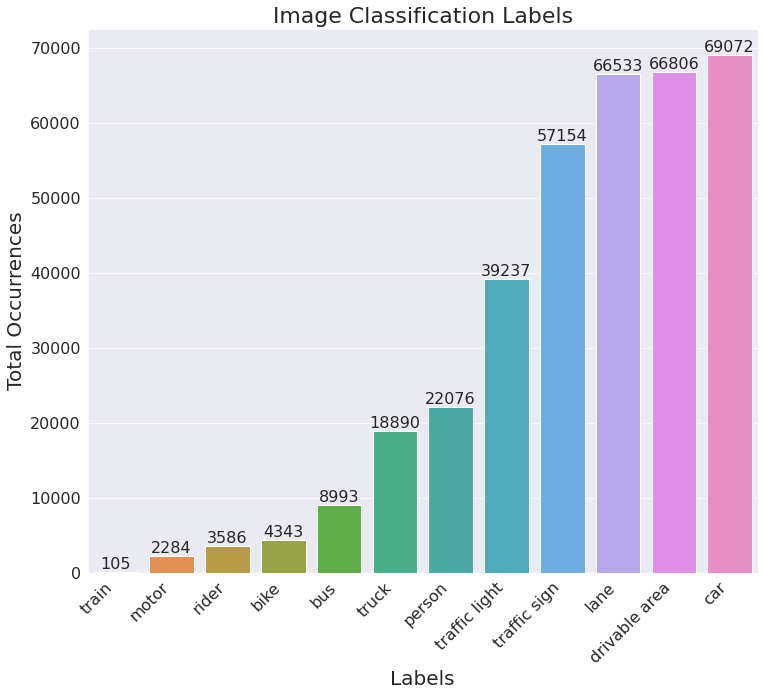

In [32]:
#set seaborn style and plt size 
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))

#create ascending order 
order= ['train','motor','rider','bike','bus', 'truck', 'person','traffic light', 
        'traffic sign', 'lane','drivable area', 'car']

#create seaborn visual 
ax= sns.barplot(labels, data_train.iloc[:,3:].sum().values, order= order)

#title and labels 
plt.title("Image Classification Labels", fontsize=22)
plt.ylabel('Total Occurrences', fontsize=20)
plt.xlabel('Labels', fontsize=20)

#adding the text labels
rects = ax.patches
labels = df_stats['Occurrence']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=16)
plt.xticks(rotation=45, fontsize=16, ha='right')
plt.yticks(fontsize=16)
plt.show()

>**Observations**
* 'car', 'drivable area', and 'lane' labels are the most frequent labels
* there are only 105 images with a 'train' in it 

## Dataframe: Total Image Count per # of Labels
How many images has 2 labels? 3 labels?...9 labels?

In [33]:
#retreiving sum of label counts
rowSums = data_train.iloc[:,3:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]
label_count = pd.DataFrame(multiLabel_counts, columns = ['Total # of images']).rename_axis('# of Labels', axis=1)
label_count

# of Labels,Total # of images
4,17393
6,14008
7,6884
3,5400
8,2683
9,888
2,761
10,225
1,85
11,13


## Visual 2: Total Image Count 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


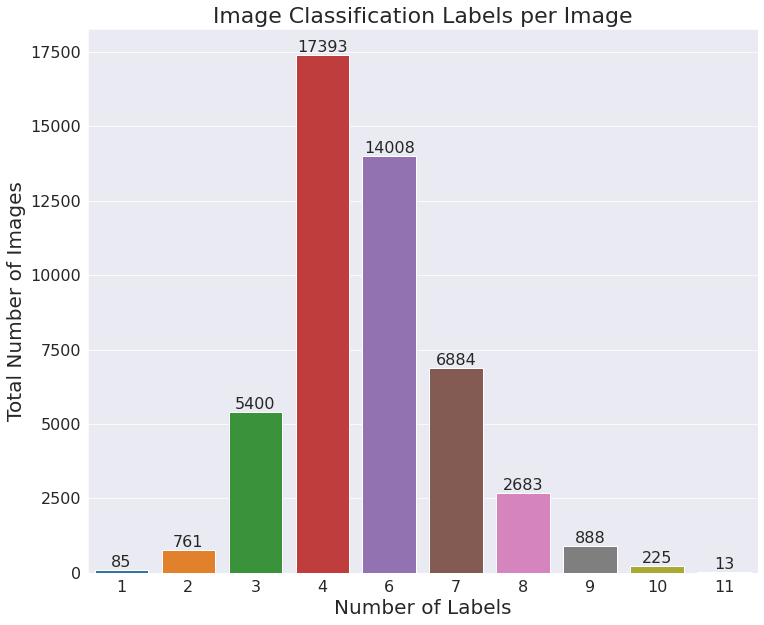

In [34]:
#set seaborn style and plt size 
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))

#create seaborn visual 
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

#title and labels 
plt.title("Image Classification Labels per Image", fontsize=22)
plt.ylabel('Total Number of Images', fontsize=20)
plt.xlabel('Number of Labels', fontsize=20)

#create label order 
count_order = ['85', '761', '5400', '17393', '14008', '6884', '2683', 
               '888', '225', '13']
#adding the text labels
rects = ax.patches
labels = count_order
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

>**Observations**
* 17,393 images of the data_train set contain 4 different labels, which is the most
* Only 85 images of the data_train set contain 1 label
* There are 0 images that contain all 12 labels, but there are 13 images that contain 11 labels  

## Explore Validation Data

In [35]:
#retreiving labels 
labels = list(data_val.columns.values)
labels = labels[3:]
print(labels)

#creating dataframe
counts = []
for label in labels:
    counts.append((label, data_val[label].sum()))
df_stats_2 = pd.DataFrame(counts, columns=['Labels', 'Occurrence'])
df_stats_2 = df_stats_2.sort_values(['Occurrence']).reset_index(drop=True)
df_stats_2

['lane', 'rider', 'traffic sign', 'bus', 'truck', 'drivable area', 'motor', 'bike', 'car', 'train', 'traffic light', 'person']


,Labels,Occurrence
0,train,14
1,motor,334
2,rider,515
3,bike,578
4,bus,1242
5,truck,2689
6,person,3220
7,traffic light,5653
8,traffic sign,8221
9,lane,9526


## Visual 3: Validation Data

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


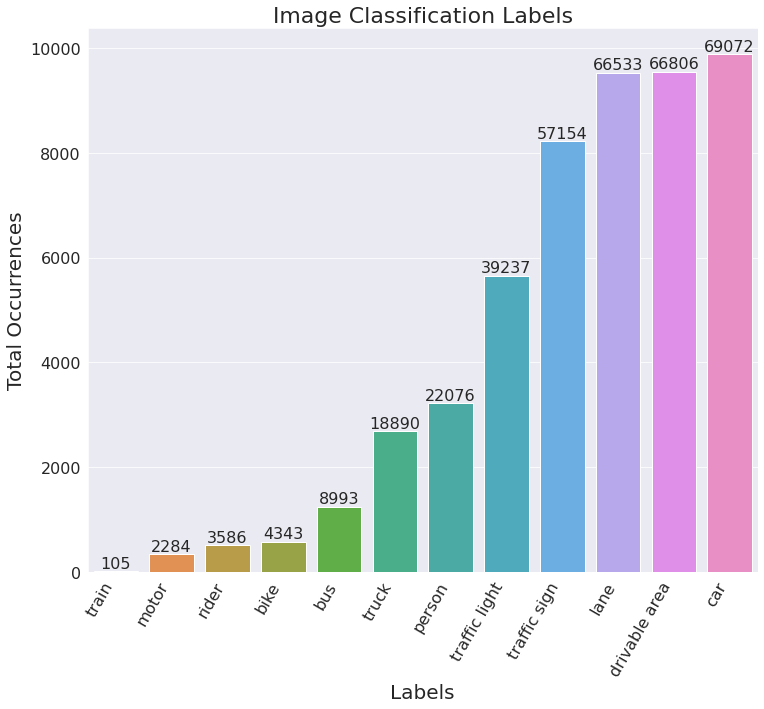

In [36]:
#set seaborn style and plt size 
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))

#create ascending order 
order= ['train','motor','rider','bike','bus', 'truck', 'person','traffic light', 
        'traffic sign', 'lane','drivable area', 'car']

#create seaborn visual 
ax= sns.barplot(labels, data_val.iloc[:,3:].sum().values, order= order)

#title and labels 
plt.title("Image Classification Labels", fontsize=22)
plt.ylabel('Total Occurrences', fontsize=20)
plt.xlabel('Labels', fontsize=20)

#adding the text labels
rects = ax.patches
labels = df_stats['Occurrence']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=16)
plt.xticks(rotation=60, fontsize=16, ha='right')
plt.yticks(fontsize=16)
plt.show()

>**Observations**
* data_val folder ascends in the same order as data_train. Double checking data_val folder doesn't contain a large majority of a label(s) that are unequal to data_train folder. For example, we do not want data_val folder to contain majority images with a 'rider' label. 

# ImageDataGenerator 

In [37]:
#Instantiate ImageDataGenerator for train/test and validation 
#add validation_split
#add IMG_SIZE 

IMG_SIZE = (86,86)

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=.2)

val_datagen = ImageDataGenerator(rescale=1./255)

In [38]:
#retreiving all the data from the 'data' dataframe and train_folder directory 
#creating train_set and test_set through ImageDataGenerator 
train_set = train_datagen.flow_from_dataframe(data_train, directory=train_folder, 
                                              x_col ='name', y_col = target_list, 
                                              class_mode = "multi_output", seed= 24,
                                              subset = 'training', batch_size=55888, 
                                              target_size = IMG_SIZE)

test_set = train_datagen.flow_from_dataframe(data_train, directory=train_folder, 
                                             x_col ='name', y_col = target_list, 
                                             class_mode = "multi_output", 
                                             seed= 24, batch_size=13971, 
                                             subset = 'validation', 
                                             target_size = IMG_SIZE)

#retreiving all the data from the data_val dataframe and val_folder directroy
#creating val_set through ImageDataGenerator  
val_set = val_datagen.flow_from_dataframe(data_val, directory=val_folder, 
                                          x_col ='name', y_col = target_list, 
                                          class_mode = "multi_output", seed= 24,
                                          batch_size=9992, target_size = IMG_SIZE)

Found 55891 validated image filenames.
Found 13972 validated image filenames.
Found 10000 validated image filenames.


In [39]:
#create datasets for train, test, validation 
#this sell takes 31 mins to run 
train_images, train_labels = next(train_set)
test_images, test_labels = next(test_set)
val_images, val_labels = next(val_set) 

In [40]:
#reshape labels 
train_labels_ = np.array(train_labels).reshape(len(train_labels), -1).T
test_labels_ = np.array(test_labels).reshape(len(test_labels), -1).T
val_labels_ = np.array(val_labels).reshape(len(val_labels), -1).T

In [41]:
#reshape images 
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

In [42]:
#explore dataset, checking number of samples and shape 
m_train = train_img.shape[0]
m_test = test_img.shape[0]
m_val = val_img.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_img shape: " + str(train_img.shape))
print ("train_labels_ shape: " + str(train_labels_.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_img shape: " + str(test_img.shape))
print ("test_labels_ shape: " + str(test_labels_.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_img shape: " + str(val_img.shape))
print ("val_labels_ shape: " + str(val_labels_.shape))

Number of training samples: 55888
Number of testing samples: 13971
Number of validation samples: 9992
train_images shape: (55888, 86, 86, 3)
train_img shape: (55888, 22188)
train_labels_ shape: (55888, 12)
test_images shape: (13971, 86, 86, 3)
test_img shape: (13971, 22188)
test_labels_ shape: (13971, 12)
val_images shape: (9992, 86, 86, 3)
val_img shape: (9992, 22188)
val_labels_ shape: (9992, 12)


**Sanity Check**

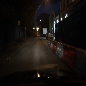

In [43]:
#observing images are viewable
array_to_img(train_images[0])

In [44]:
#observing labels match the image
pd.Series(train_labels_[0], index=target_list)

lane             1
rider            0
traffic sign     1
bus              1
truck            1
drivable area    1
motor            0
bike             0
car              1
train            0
traffic light    0
person           0
dtype: int64

# Functions 

## Model History Function 

In [45]:
def model_history(history):
    """
    Plots model history, one graph displays loss and other accuracy 

    Parameters:
    ----------
        history: result of a keras model.fit()

    Returns:
    -------
        dataframe of loss and accuracy 
        2 graphs diplaying loss and accuracy for training and validation 
    """
    history_df = pd.DataFrame(history.history)
    display(history_df.tail(10))
    
    #plot loss
    ax1 = history_df[[col for col in history_df.columns if 'loss' in col]].plot(marker='.')
    ax1.set(xlabel='Epoch',ylabel='MSE')
    plt.title('Training and Validation Loss')
    plt.show()

    #plot accuracy
    ax2 = history_df[[col for col in history_df.columns if 'acc' in col]].plot(marker='.')
    ax2.set(xlabel='Epoch',ylabel='Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.show()

## Model Predict Function

In [46]:
np.random.seed(123)
def model_predict(model, test_img):
  """
  Predicts results on test images using your choice of model

  Parameters:
  ----------
      model: model you want to predict with
      test_img: test images to predict on 

  Returns:
  -------
      an array with an array of predictions per image in test set 
  """
  
  pred_test = model.predict(test_img)
  pred_test = pred_test.round()
  return pred_test

## Plot Multi Label Confusion Matrix 

In [47]:
def plot_multi_label_confusion_matrix(test_labels_, pred_test, 
                                      column_labels=target_list, cmap='Blues'):
    """
    Create a One-vs-Rest confusion matrix 
    for each label in a multi-label classification.
    
    Parameters:
    -----------
        test_labels_: array, ground truth labels

        pred_test: array, predicted labels (same shape as test_labels)

        column_labels: list, label names to title each plot.
  
        cmap: str (default: 'Blues')(interpreted by Seaborn)
     

    Returns:
    -------
        Confusion matrix for each label(12 labels)

    """
   
    #get multi-label confusion matrix
    neo = tfa.metrics.MultiLabelConfusionMatrix
    y_true = tf.constant(test_labels_, dtype=tf.int32)
    y_pred = tf.constant(pred_test, dtype=tf.int32)
    output = neo(num_classes=12)
    output.update_state(y_true, y_pred)
    confusion_matrix = output.result().numpy()
            
    #length of confusion_matrix 
    num_labels = len(confusion_matrix)

    #create figures
    fig, ax_lst = plt.subplots(ncols=4, nrows=3, figsize=(18,18))
    ax_lst = ax_lst.flatten()
    
    column_labels = column_labels

    #plot
    for ax, matrix, label in zip(ax_lst, confusion_matrix, column_labels):
      matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
      sns.heatmap(matrix, cmap=cmap, annot=True, square=True, 
                  annot_kws={"size": 12}, ax=ax, linewidths=.25, linecolor='black')
      ax.set(title=label, xlabel='Predicted Label', ylabel='True Label')
            
    #remove unused axes in subplot.
    ax_to_del = ax_lst[num_labels:]
    for ax in ax_to_del:
      fig.delaxes(ax)
    fig.tight_layout()
    plt.show()
      
    return fig

## Hamming Loss Function 

In [48]:
def hamming_loss_func(test_labels_, pred_test):
  """
  Hamming loss function calculates number of wrongly predicted labels to total 
  number of labels 
  
  Parameters:
  ----------
      test_labels_: ground truth labels
      pred_test: predicted labels generated by the model 

  Returns:
  -------
      hamming loss: a percentage of wrong labels/total labels 
      accuracy: 1 - hamming loss 
  """
  hamming = tfa.metrics.HammingLoss(mode='multilabel', threshold=.8)
  actuals = tf.constant(test_labels_, dtype=tf.int32)
  predictions = tf.constant(pred_test, dtype=tf.float32)
  hamming.update_state(actuals, predictions)
  print('HAMMING LOSS: ', hamming.result().numpy())
  correct_labels = [1 - (hamming.result().numpy())]
  print("ACCURACY: ", correct_labels[0])

## Model Report Function 

In [49]:
def model_report(model, history, train_images, train_labels_, test_images, 
                test_labels_, column_labels= target_list, cmap='Blues'):
  """
  Combining all functions in to one report. In addition, adds a classification
  report as well

  Parameters:
  ----------
      model: model to evaluate 
      history: model.fit()
      train_images: training images with proper shape (# of images, image size)
      train_labels_: training labels with proper shape (# of images, # of labels)
      test_images: testing images with proper shape (# of images, image size)
      test_labels_: testing labels with proper shape (# of images, # of labels)
      column_labels: list of labels, names 
      cmap: default 'Blues', seaborn 

  Returns:
  -------
      train results: array, loss and accuracy 
      test results: array, loss and accuracy 
      classification report: 
      confusion matrix: 
      hamming loss metric: 
  """ 
  model_history(history)
  print("---------------------------------------------------------------------")
  results_train = model.evaluate(train_images, train_labels_)
  results_test = model.evaluate(test_images, test_labels_)
  print("---------------------------------------------------------------------")
  print('TRAIN RESULTS:', results_train)
  print('TEST RESULTS:', results_test)
  print("---------------------------------------------------------------------")
  pred_test = model.predict(test_images)
  pred_test = pred_test.round()
  print("---------------------------------------------------------------------")
  print("CLASSIFICATION REPORT")
  print("---------------------------------------------------------------------")
  print(classification_report(test_labels_, pred_test, target_names=column_labels))
  print("---------------------------------------------------------------------")
  plot_multi_label_confusion_matrix(test_labels_, pred_test, 
                                    column_labels=column_labels, cmap=cmap)
  print("---------------------------------------------------------------------")
  hamming_loss_func(test_labels_, pred_test)
  print("---------------------------------------------------------------------")


## Pred vs True Function 

In [50]:
def pred_vs_true(i, model):
  """
  Evaluating predictions from model versus true labels 

  Parameters:
  ----------
      i: integer, which image you want to evaluate 
      model: the model you would like to predict with 

  Returns:
  -------
    image: 
    Model Prediction: series, names and values(0 or 1)
    True Labels: ground truth, names and values (0,1 )
  """
  print("Image")
  print('-----------------')
  x = array_to_img(test_images[i])
  newsize = (112,112)
  x = x.resize(newsize)
  display(x)
  print('-----------------')
  pred_test = model_predict(model, test_images)
  df = pd.DataFrame({'Model Prediction': pred_test[i], 'True Labels':test_labels_[i]},
                index = target_list)
  return df 
  

#**Variable Names**
--------------------------------------------
* Number of training samples: 55888
* Number of testing samples: 13971
* Number of validation samples: 9992
--------------------------------------------
* train_images shape: (55888, 86, 86, 3)
* train_img shape: (55888, 22188)
* train_labels_ shape: (55888, 12)
-----------------------------------------------
* test_images shape: (13971, 86, 86, 3)
* test_img shape: (13971, 22188)
* test_labels_ shape: (13971, 12)
-----------------------------------------------
* val_images shape: (9992, 86, 86, 3)
* val_img shape: (9992, 22188)
* val_labels_ shape: (9992, 12)

# Dense Network

**Creating a baseline model with a dense network**

In [51]:
#fix random seed for reproducibility
np.random.seed(123)

#instantiate model 
baseline = Sequential()

#input layer 
baseline.add(layers.Dense(128, activation='relu', input_shape=(22188,)))

#first hidden layer 
baseline.add(layers.Dense(64, activation='relu'))

#second hidden layer 
baseline.add(layers.Dense(32, activation='relu'))

#output layer
baseline.add(layers.Dense(12, activation='sigmoid'))

#compile the model
baseline.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']) 

#summary
baseline.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2840192   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 12)                396       
Total params: 2,850,924
Trainable params: 2,850,924
Non-trainable params: 0
_________________________________________________________________


In [52]:
#fit the model 
baseline_history = baseline.fit(train_img,
                    train_labels_,
                    epochs=15,
                    batch_size=64,
                    validation_data=(val_img, val_labels_))

Epoch 1/15
874/874 [==============================] - 7s 6ms/step - loss: 0.4343 - accuracy: 0.0851 - val_loss: 0.3193 - val_accuracy: 0.0067
Epoch 2/15
874/874 [==============================] - 5s 5ms/step - loss: 0.3071 - accuracy: 0.0040 - val_loss: 0.3021 - val_accuracy: 0.0048
Epoch 3/15
874/874 [==============================] - 5s 5ms/step - loss: 0.3001 - accuracy: 0.0059 - val_loss: 0.3046 - val_accuracy: 0.0045
Epoch 4/15
874/874 [==============================] - 5s 5ms/step - loss: 0.2962 - accuracy: 0.0055 - val_loss: 0.3027 - val_accuracy: 0.0068
Epoch 5/15
874/874 [==============================] - 5s 5ms/step - loss: 0.2950 - accuracy: 0.0068 - val_loss: 0.2978 - val_accuracy: 0.0073
Epoch 6/15
874/874 [==============================] - 5s 5ms/step - loss: 0.2946 - accuracy: 0.0073 - val_loss: 0.2988 - val_accuracy: 0.0085
Epoch 7/15
874/874 [==============================] - 5s 5ms/step - loss: 0.2917 - accuracy: 0.0075 - val_loss: 0.3075 - val_accuracy: 0.0041
Epoch 

## Model Report 

,loss,accuracy,val_loss,val_accuracy
5,0.293902,0.007014,0.298818,0.008507
6,0.292437,0.007175,0.307454,0.004103
7,0.291272,0.007837,0.302664,0.005705
8,0.289734,0.007372,0.312350,0.007906
9,0.288867,0.009161,0.299271,0.004904
10,0.287432,0.007748,0.298537,0.006305
11,0.286381,0.009770,0.307753,0.007606
12,0.285652,0.006531,0.312848,0.008307
13,0.284304,0.006155,0.305296,0.006405
14,0.283101,0.006227,0.308975,0.008106


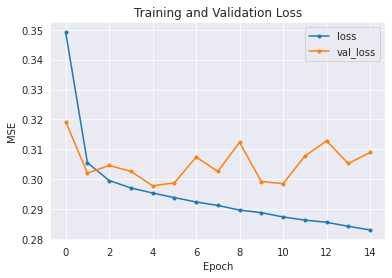

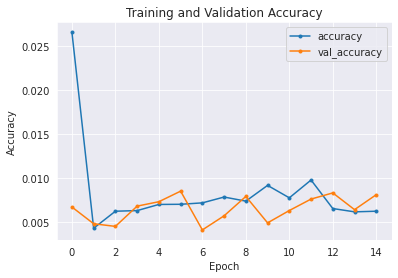

---------------------------------------------------------------------
437/437 [==============================] - 1s 3ms/step - loss: 0.3087 - accuracy: 0.0072
---------------------------------------------------------------------
TRAIN RESULTS: [0.28323328495025635, 0.008123389445245266]
TEST RESULTS: [0.3086552023887634, 0.0072292606346309185]
---------------------------------------------------------------------
---------------------------------------------------------------------
CLASSIFICATION REPORT
---------------------------------------------------------------------
               precision    recall  f1-score   support

         lane       0.96      1.00      0.98     13354
        rider       0.00      0.00      0.00       701
 traffic sign       0.82      1.00      0.90     11456
          bus       0.00      0.00      0.00      1817
        truck       0.00      0.00      0.00      3841
drivable area       0.95      1.00      0.98     13305
        motor       0.00      0.00  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


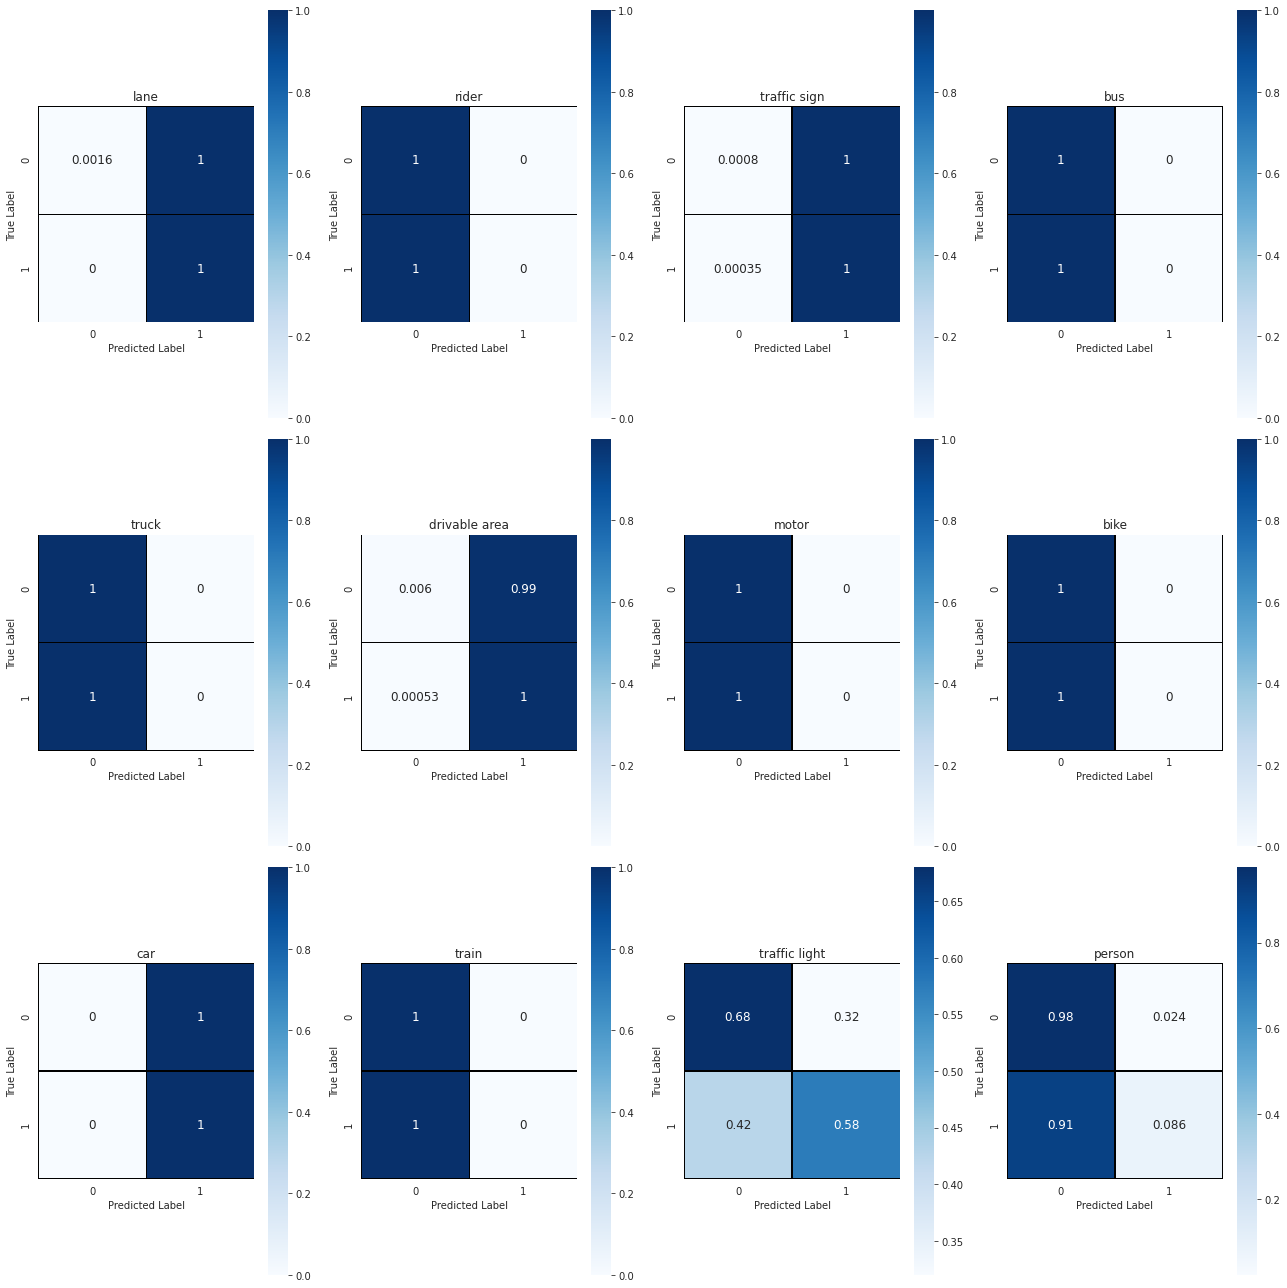

---------------------------------------------------------------------
HAMMING LOSS:  0.12691171
ACCURACY:  0.8730882853269577
---------------------------------------------------------------------


In [53]:
#model_report function to retrieve metrics 
model_report(baseline, baseline_history, train_img, train_labels_, test_img, test_labels_)

## Observations: 

> * the best metric to measure our model is the Hamming Loss; which is .1271(depending on the run); the amount of wrong labels predicted to the total number of labels; which in turn gives an accuracy of .8728
* the next metric to measure our model is given by the accuracy on the test validation set: approximately .0389 (depending on the run), very low
* the loss for validation set (around .3255) is slightly higher than the loss for the train set (around .2842), the graph for validation jumps up and down which could be signs of overfitting 
* These are very surprising metrics considering this is a basic dense network and not a CNN

# CNN Models

## Basic Model 

Our first CNN model will keep the feature space wide and shallow in the initial stages of the network by using smaller kernel/filter sizes and a low number of channels. This neural network will have a input layer, hidden layer and then an output layer.  The activation function will be 'relu' and the final activation will be 'sigmoid' as it is a multilabel image classification network. We will use the optimizer 'Adam' as it generally bodes well for CNNs. 

In [54]:
#fix random seed for reproducibility
np.random.seed(123)

#instantiate model
basic = Sequential()

#input layer
basic.add(layers.Conv2D(8,(3, 3), activation='relu',padding='same', 
                        input_shape=(train_images.shape[1],train_images.shape[2],3)))
basic.add(layers.MaxPooling2D((2, 2)))

#first hidden layer
basic.add(layers.Conv2D(16, (5, 5), activation='relu'))
basic.add(layers.MaxPooling2D((2, 2)))

#output layer  
basic.add(layers.Flatten())
basic.add(layers.Dense(32, activation='relu'))
basic.add(layers.Dense(64, activation='relu'))
basic.add(layers.Dense(12, activation='sigmoid'))

#compile model 
basic.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

#summary
basic.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 86, 86, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 43, 43, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 39, 39, 16)        3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5776)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                184864    
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

In [55]:
#fit the model 
basic_history = basic.fit(train_images,
                    train_labels_,
                    epochs=15,
                    batch_size=64,
                    validation_data=(val_images, val_labels_))

Epoch 1/15
874/874 [==============================] - 10s 7ms/step - loss: 0.3205 - acc: 0.0061 - val_loss: 0.2887 - val_acc: 0.0055
Epoch 2/15
874/874 [==============================] - 6s 7ms/step - loss: 0.2858 - acc: 0.0063 - val_loss: 0.2849 - val_acc: 0.0128
Epoch 3/15
874/874 [==============================] - 6s 7ms/step - loss: 0.2784 - acc: 0.0106 - val_loss: 0.2805 - val_acc: 0.0065
Epoch 4/15
874/874 [==============================] - 6s 7ms/step - loss: 0.2714 - acc: 0.0238 - val_loss: 0.2782 - val_acc: 0.0515
Epoch 5/15
874/874 [==============================] - 6s 7ms/step - loss: 0.2670 - acc: 0.0562 - val_loss: 0.2773 - val_acc: 0.0597
Epoch 6/15
874/874 [==============================] - 6s 7ms/step - loss: 0.2629 - acc: 0.1053 - val_loss: 0.2801 - val_acc: 0.1066
Epoch 7/15
874/874 [==============================] - 6s 7ms/step - loss: 0.2569 - acc: 0.1246 - val_loss: 0.2838 - val_acc: 0.1280
Epoch 8/15
874/874 [==============================] - 6s 7ms/step - loss: 0

### Model Report 

,loss,acc,val_loss,val_acc
5,0.262656,0.105371,0.280057,0.106585
6,0.257826,0.132354,0.283805,0.128002
7,0.252891,0.155024,0.287566,0.101081
8,0.248462,0.176836,0.288132,0.173639
9,0.244214,0.187464,0.295638,0.188251
10,0.240300,0.203997,0.299090,0.197058
11,0.236507,0.214107,0.303491,0.162930
12,0.232829,0.208864,0.308523,0.233287
13,0.230381,0.228135,0.316613,0.189652
14,0.227056,0.233413,0.316357,0.223979


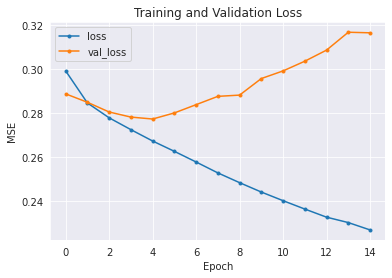

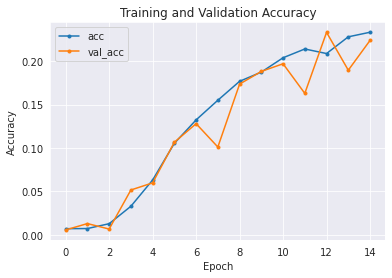

---------------------------------------------------------------------
437/437 [==============================] - 1s 3ms/step - loss: 0.3153 - acc: 0.2285
---------------------------------------------------------------------
TRAIN RESULTS: [0.21741408109664917, 0.23321643471717834]
TEST RESULTS: [0.31527596712112427, 0.22854484617710114]
---------------------------------------------------------------------
---------------------------------------------------------------------
CLASSIFICATION REPORT
---------------------------------------------------------------------
               precision    recall  f1-score   support

         lane       0.96      0.99      0.97     13354
        rider       0.11      0.04      0.06       701
 traffic sign       0.83      0.94      0.88     11456
          bus       0.23      0.06      0.10      1817
        truck       0.41      0.18      0.25      3841
drivable area       0.96      0.99      0.97     13305
        motor       0.13      0.02      0.0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


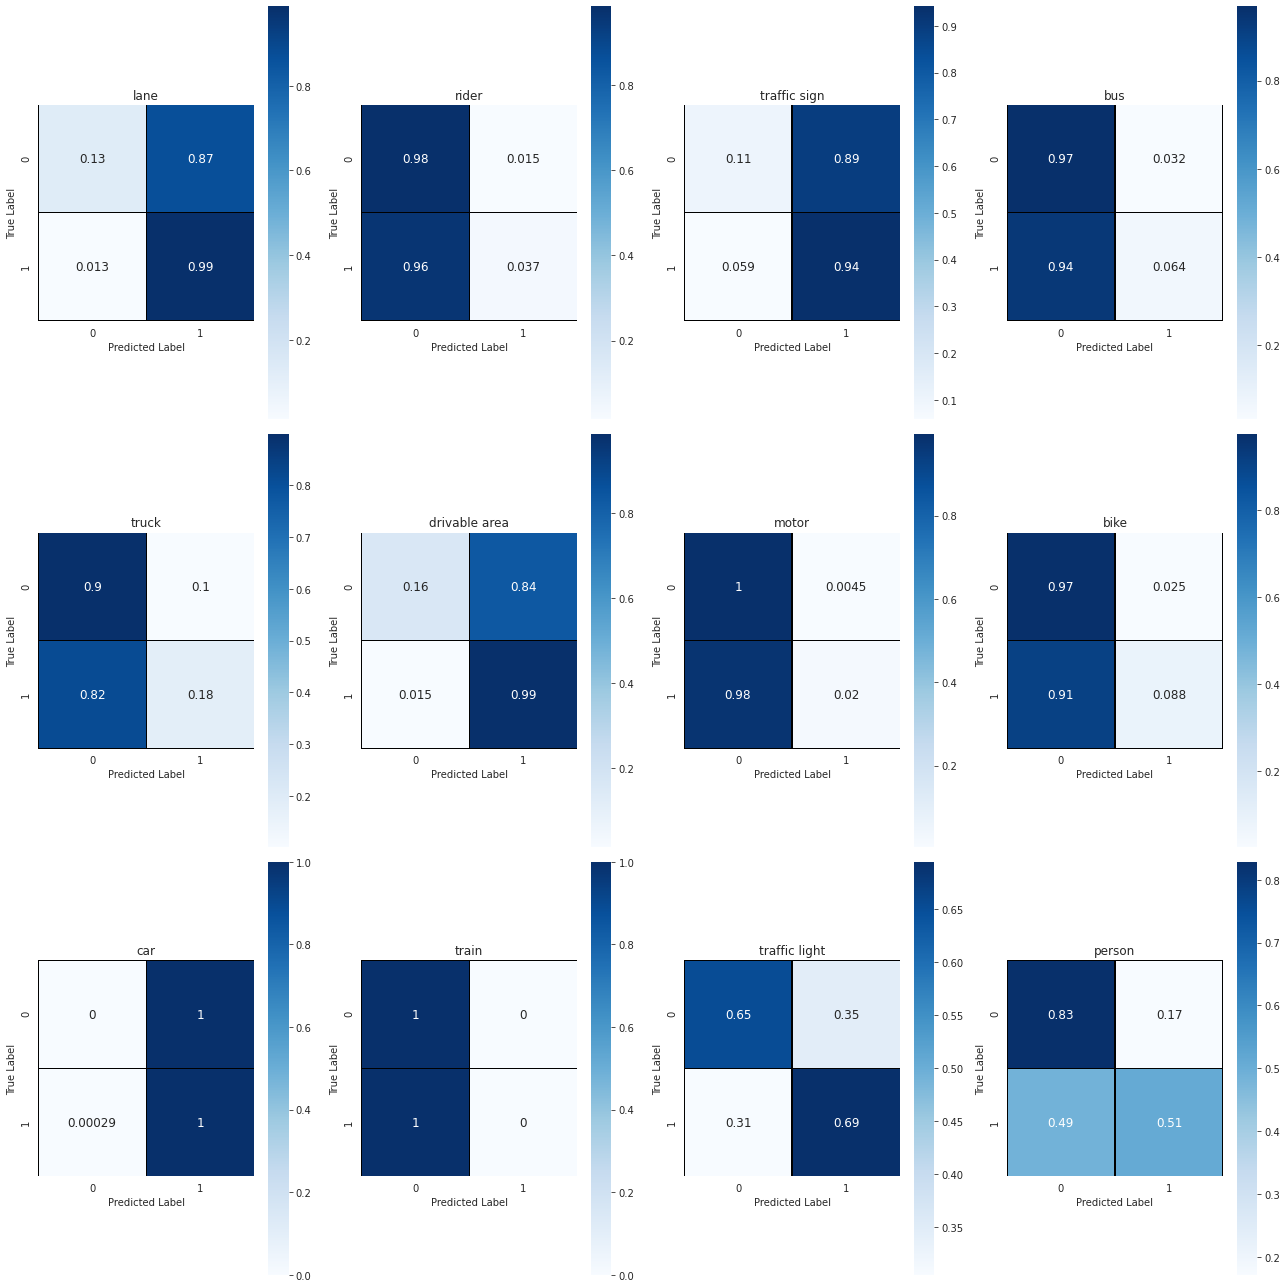

---------------------------------------------------------------------
HAMMING LOSS:  0.12917234
ACCURACY:  0.8708276599645615
---------------------------------------------------------------------


In [56]:
#model_report function to retrieve metrics 
model_report(basic, basic_history, train_images, train_labels_, test_images, 
             test_labels_, column_labels= target_list, cmap='Blues')

### Observations: 

> * the best metric to measure our model is the Hamming Loss; which is .1292 (depending on the run); the amount of wrong labels predicted to the total number of labels, which in turn gives an accuracy of .8708
* the next metric to measure our model is given by the accuracy on the test validation set: approximately .2285 (depending on the run)
* Val loss is .3288 and is greater than the loss at .2188. , signs of overfitting 

## Model II
In our second model, we will increase our number of channels (doubling it) and we will add a second hidden layer. We will also increase our epoch from 15 to 20 for this model. 

In [57]:
#fix random seed for reproducibility
np.random.seed(123)

#instantiate model
model_2 = Sequential()

#input layer
model_2.add(layers.Conv2D(32,(3, 3), activation='relu',padding='same', 
                        input_shape=(train_images.shape[1],train_images.shape[2],3)))
model_2.add(layers.MaxPooling2D((2, 2)))

#first hidden layer
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))

#second hidden layer
model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))

#output layer  
model_2.add(layers.Flatten())
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(12, activation='sigmoid'))

#compile model 
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

#summary
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 86, 86, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10368)            

In [58]:
#fit the model 
model_2hist = model_2.fit(train_images,
                    train_labels_,
                    epochs=20,
                    batch_size=64,
                    validation_data=(val_images, val_labels_))

Epoch 1/20
874/874 [==============================] - 11s 11ms/step - loss: 0.3089 - acc: 0.0054 - val_loss: 0.2887 - val_acc: 0.0051
Epoch 2/20
874/874 [==============================] - 10s 11ms/step - loss: 0.2841 - acc: 0.0068 - val_loss: 0.2792 - val_acc: 0.0062
Epoch 3/20
874/874 [==============================] - 10s 11ms/step - loss: 0.2720 - acc: 0.0099 - val_loss: 0.2687 - val_acc: 0.0304
Epoch 4/20
874/874 [==============================] - 10s 11ms/step - loss: 0.2612 - acc: 0.0439 - val_loss: 0.2691 - val_acc: 0.0612
Epoch 5/20
874/874 [==============================] - 10s 11ms/step - loss: 0.2522 - acc: 0.0922 - val_loss: 0.2662 - val_acc: 0.1320
Epoch 6/20
874/874 [==============================] - 10s 11ms/step - loss: 0.2425 - acc: 0.1599 - val_loss: 0.2700 - val_acc: 0.1149
Epoch 7/20
874/874 [==============================] - 10s 11ms/step - loss: 0.2289 - acc: 0.1746 - val_loss: 0.2800 - val_acc: 0.1846
Epoch 8/20
874/874 [==============================] - 10s 11ms

### Model Report 

,loss,acc,val_loss,val_acc
10,0.175126,0.241071,0.338898,0.192854
11,0.162067,0.247584,0.368271,0.186149
12,0.150274,0.250107,0.399332,0.276421
13,0.138688,0.263438,0.433357,0.345176
14,0.128593,0.275444,0.462044,0.225480
15,0.119660,0.274710,0.496693,0.278723
16,0.111105,0.284748,0.542874,0.282926
17,0.102650,0.286680,0.588790,0.301741
18,0.095674,0.293891,0.624095,0.305745
19,0.090049,0.295466,0.685363,0.254704


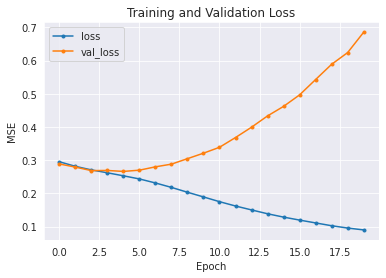

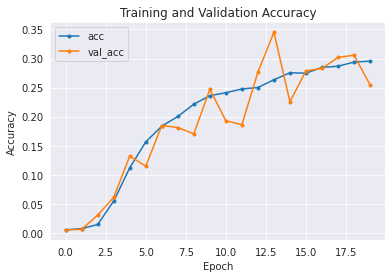

---------------------------------------------------------------------
437/437 [==============================] - 2s 3ms/step - loss: 0.6876 - acc: 0.2520
---------------------------------------------------------------------
TRAIN RESULTS: [0.0703849345445633, 0.25742557644844055]
TEST RESULTS: [0.6876063346862793, 0.2519504725933075]
---------------------------------------------------------------------
---------------------------------------------------------------------
CLASSIFICATION REPORT
---------------------------------------------------------------------
               precision    recall  f1-score   support

         lane       0.97      0.96      0.96     13354
        rider       0.13      0.08      0.10       701
 traffic sign       0.83      0.88      0.85     11456
          bus       0.18      0.16      0.17      1817
        truck       0.37      0.33      0.35      3841
drivable area       0.97      0.97      0.97     13305
        motor       0.08      0.06      0.07  

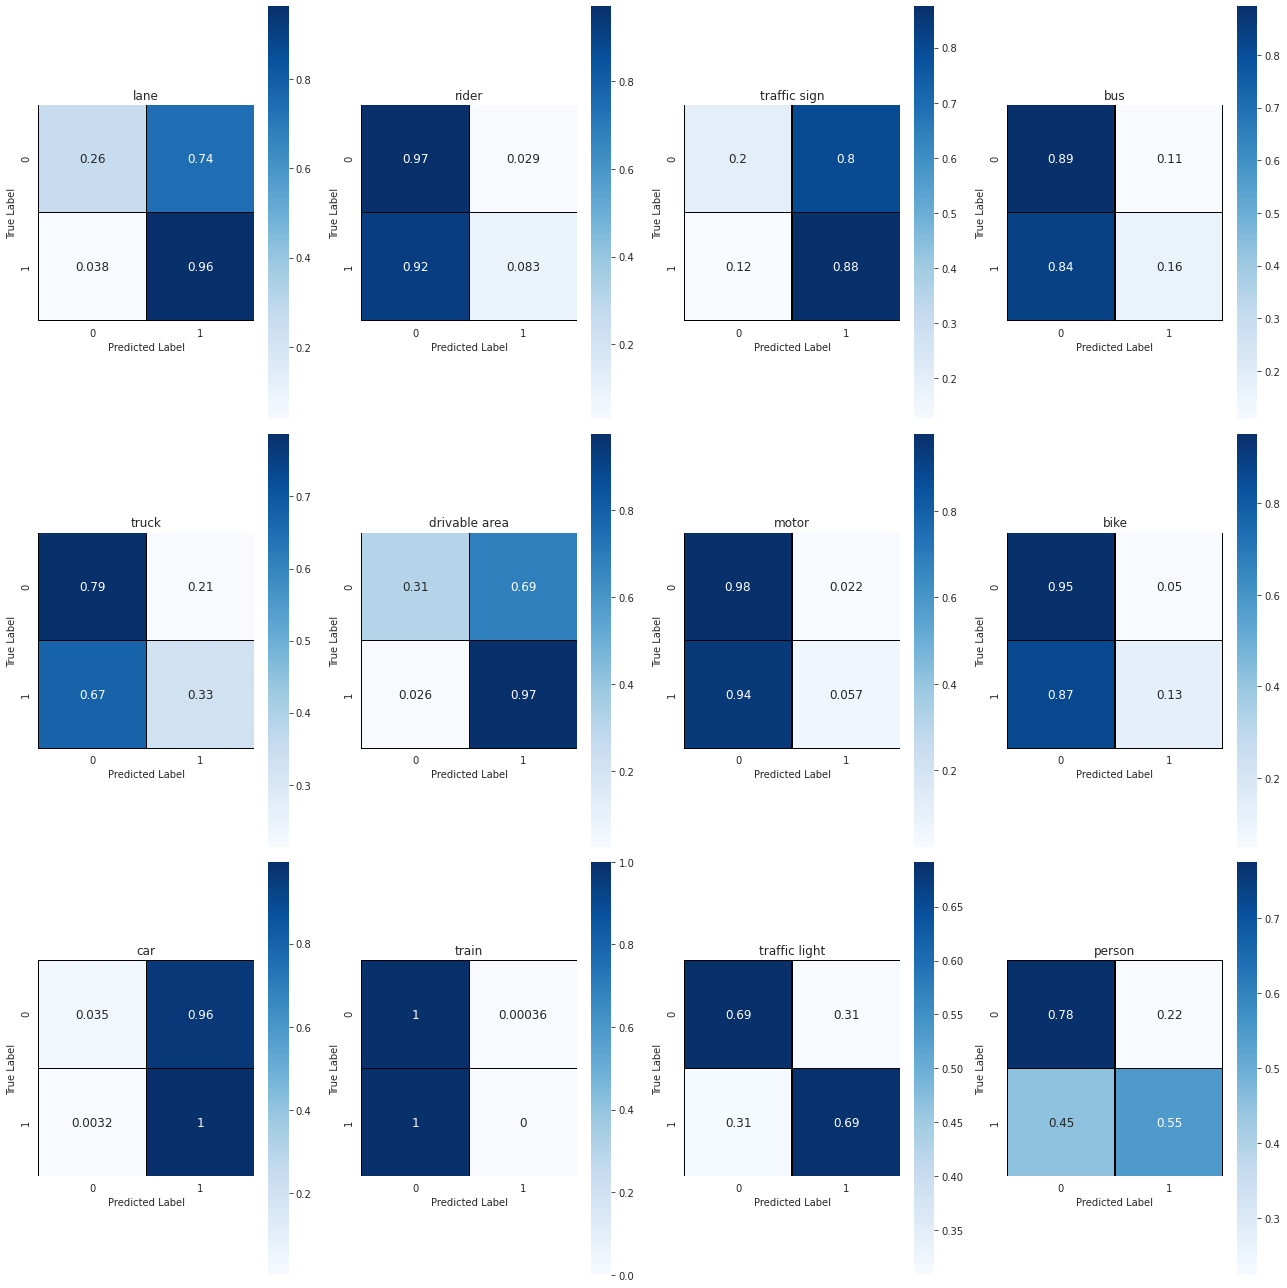

---------------------------------------------------------------------
HAMMING LOSS:  0.14704865
ACCURACY:  0.8529513478279114
---------------------------------------------------------------------


In [59]:
#model_report function to retrieve metrics
model_report(model_2, model_2hist, train_images, train_labels_, test_images, test_labels_, 
                 column_labels= target_list, cmap='Blues')

### Observations: 

> * the best metric to measure our model is the Hamming Loss; which is .1441 (depending on the run); the amount of wrong labels predicted to the total number of labels; which in turn gives an accuracy of .8559
* the next metric to measure our model is given by the accuracy on the test validation set: approximately .2516 (depending on the run)
* the loss for validation set (around .6110) is six times greater than the loss for the train set (around .1018), signs of overfitting

## Model III

In our third model, we will try something a little diffrent. Our past two models followed a Conv2D-Pool pattern for all it's layers. This time around, we will try a Conv2D-Conv2D-Pool pattern for all the layers. 

In [60]:
#fix random seed for reproducibility
np.random.seed(123)

#instantiate model
model_3 = Sequential()

#input layer
model_3.add(layers.Conv2D(32,(3, 3), activation='relu',padding='same', 
                        input_shape=(train_images.shape[1],train_images.shape[2],3)))
model_3.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model_3.add(layers.MaxPooling2D((2, 2)))

#first hidden layer
model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))

#second hidden layer
model_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))

#output layer  
model_3.add(layers.Flatten())
model_3.add(layers.Dense(128, activation='relu'))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(12, activation='sigmoid'))

#compile model 
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

#summary
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 86, 86, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 86, 86, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 39, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 17, 17, 128)      

In [61]:
#fit the model 
model_3hist = model_3.fit(train_images,
                    train_labels_,
                    epochs=20,
                    batch_size=64,
                    validation_data=(val_images, val_labels_))

Epoch 1/20
874/874 [==============================] - 20s 22ms/step - loss: 0.3182 - acc: 0.0071 - val_loss: 0.2903 - val_acc: 0.0048
Epoch 2/20
874/874 [==============================] - 19s 21ms/step - loss: 0.2900 - acc: 0.0060 - val_loss: 0.2819 - val_acc: 0.0073
Epoch 3/20
874/874 [==============================] - 19s 21ms/step - loss: 0.2800 - acc: 0.0075 - val_loss: 0.2721 - val_acc: 0.0068
Epoch 4/20
874/874 [==============================] - 19s 21ms/step - loss: 0.2694 - acc: 0.0212 - val_loss: 0.2698 - val_acc: 0.0305
Epoch 5/20
874/874 [==============================] - 19s 21ms/step - loss: 0.2617 - acc: 0.0731 - val_loss: 0.2604 - val_acc: 0.1329
Epoch 6/20
874/874 [==============================] - 19s 22ms/step - loss: 0.2546 - acc: 0.1578 - val_loss: 0.2574 - val_acc: 0.1637
Epoch 7/20
874/874 [==============================] - 19s 21ms/step - loss: 0.2469 - acc: 0.2151 - val_loss: 0.2578 - val_acc: 0.1701
Epoch 8/20
874/874 [==============================] - 19s 21ms

### Model Report 

,loss,acc,val_loss,val_acc
10,0.205207,0.227079,0.294722,0.220176
11,0.190118,0.236634,0.309706,0.252802
12,0.173795,0.218401,0.327771,0.226982
13,0.158083,0.252255,0.357682,0.250300
14,0.143187,0.250680,0.394974,0.281025
15,0.129513,0.263545,0.428578,0.224480
16,0.117185,0.252934,0.477957,0.284327
17,0.106037,0.257569,0.536691,0.225881
18,0.096141,0.254992,0.554254,0.220576
19,0.086765,0.248014,0.615835,0.266513


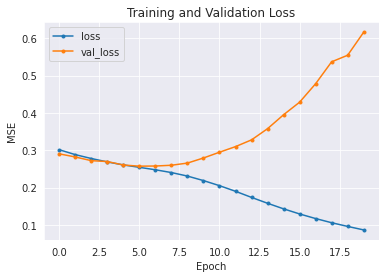

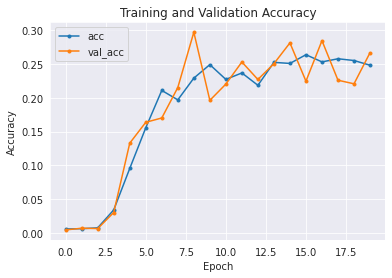

---------------------------------------------------------------------
437/437 [==============================] - 2s 5ms/step - loss: 0.6175 - acc: 0.2568
---------------------------------------------------------------------
TRAIN RESULTS: [0.07641799002885818, 0.26304394006729126]
TEST RESULTS: [0.617461621761322, 0.25681769847869873]
---------------------------------------------------------------------
---------------------------------------------------------------------
CLASSIFICATION REPORT
---------------------------------------------------------------------
               precision    recall  f1-score   support

         lane       0.96      0.98      0.97     13354
        rider       0.11      0.07      0.09       701
 traffic sign       0.83      0.89      0.86     11456
          bus       0.18      0.13      0.15      1817
        truck       0.37      0.29      0.33      3841
drivable area       0.96      0.98      0.97     13305
        motor       0.05      0.03      0.03 

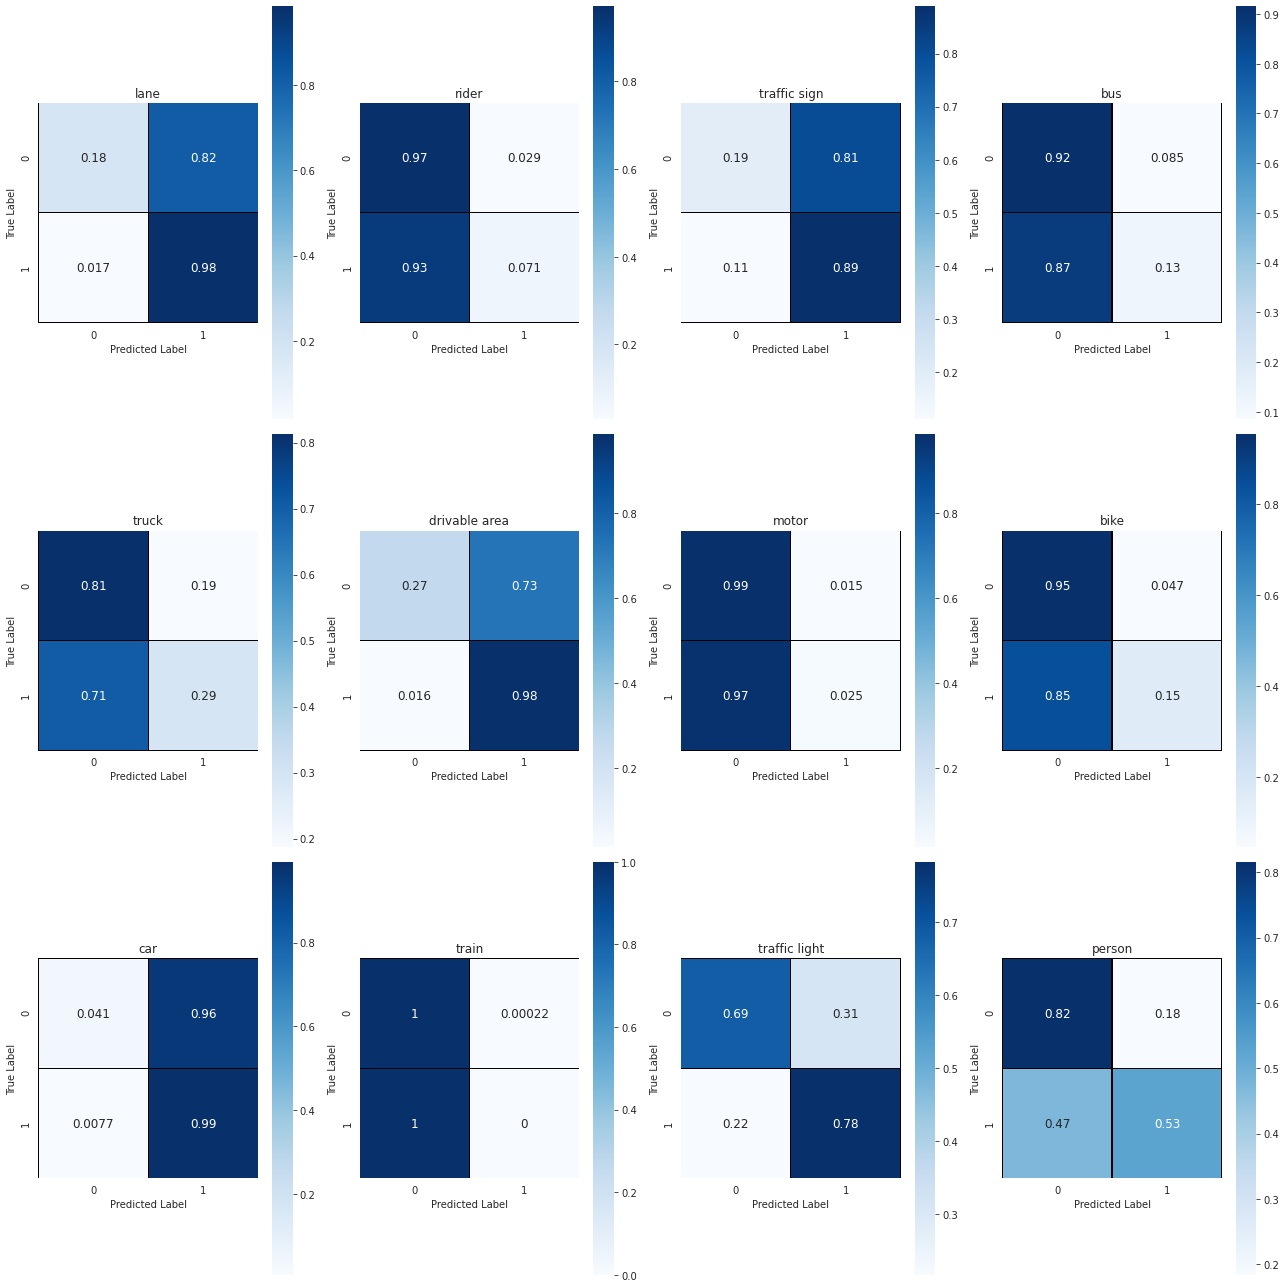

---------------------------------------------------------------------
HAMMING LOSS:  0.13566794
ACCURACY:  0.8643320649862289
---------------------------------------------------------------------


In [62]:
#model_report function to retrieve metrics
model_report(model_3, model_3hist, train_images, train_labels_, test_images, test_labels_, 
                 column_labels= target_list, cmap='Blues')

### Observations: 

> * the best metric to measure our model is the Hamming Loss; which is .1330 (depending on the run); the amount of wrong labels predicted to the total number of labels; which in turn gives an accuracy of .8669
* the next metric to measure our model is given by the accuracy on the test validation set: approximately .2568 (depending on the run)
* the loss for validation set (around .5799) is six times greater than the loss for the train set (around .0964), signs of overfitting

# Overall Observations: 

>* **Basic model** 
    
    hamming loss = approximately .1292
    test results accuracy = approximately .2285
    

>* **Model_2** 

    hamming loss = approximately .1441
    test results accuracy = approximately .2516

>* **Model_3** 

    hamming loss = approximately .1330
    test results accuracy = approximately .2568

* Accuracy is extremly low for all models but it's not a great indicator when it comes to multilabel image classification. Hamming loss returns a metric of how many wrong labels predicted divided by total number of labels. The closer the number is to zero, the better. All three models have nearly the same hamming loss metric with the basic model and model 3 slightly lower. Another observation that was made is when these models are being fit to the training data, model_3 had the most consistent metrics. The basic model and model 2 would sometimes return an accuracy rate of .5 and sometimes .12. A much larger range than model 3. To fine tune the model, in this case, I will choose Model_3. 

# Tuning CNN Model III

##Function

In [63]:
def make_cnn(padding='same', dropout =.2, optimizer=keras.optimizers.Adam(lr=0.001)):
    """
    Creating a neural network function

    Parameters:
    ----------
        padding: 'same' or 'valid'
        dropout: between 0 and 1
        optimizer: keras optimizer 

    Returns:
    -------
        model summary
        model (construction of model)
    """

    #fix random seed for reproducibility
    np.random.seed(123)

    #instantiate model 
    model = Sequential()

    #input layer 
    model.add(layers.Conv2D(32,(3, 3), activation='relu',padding=padding,
              input_shape=(train_images.shape[1],train_images.shape[2],3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu',padding=padding))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(dropout))

    #first hidden layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(dropout))

    #second hidden layer 
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(dropout))

    #output layer  
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(12, activation='sigmoid'))

    #compile model 
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['acc'])

    #summary
    model.summary()
    return model 


## Creating Callbacks

In [64]:
#creating early stopping to prevent model from overfitting 
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_acc", min_delta=0,
                                                  patience=4, verbose=1, 
                                                  mode="auto", baseline=None, 
                                                  restore_best_weights=True)

#creating filepath to save model 
filepath = '/gdrive/My Drive/Image Classification Models/weights.{epoch:02d}-{val_acc:.2f}.hdf5'

#creating check point to save the best model 
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = filepath,
                                    monitor="val_acc", verbose=1,
                                    save_best_only=True, mode="auto")

#learning_rate = tf.keras.callbacks.LearningRateScheduler(schedule, verbose=0)

#logger = tf.keras.callbacks.CSVLogger(filename, separator=",", append=False)

#adding all callbacks a variable 
callbacks = [early_stopping, checkpoint]
callbacks
 

## Grid Search

**Modifying Function**

In [65]:
from keras import backend as K
list_of_models = []
#garbage collector 
import gc


def make_cnn_grid(padding='same', dropout =.2, optimizer='adam', 
                  list_of_models=list_of_models):
    
    
    """
    Modified function for grid search. Prior to running next model with different
    parameters, we will clear the session then start to run next model. This will
    save ram usage. 
    Parameters:
    ----------
        padding: 'same' or 'valid'
        dropout: between 0 and 1
        optimizer: keras optimizer 
        list_of_models: open array 


    Returns:
    -------
        return model 
    """

    print("Making CNN")

    #delete temp model and push to garabe collector, clear session prior to next model 
    for temp_model in list_of_models:
        print("cleaning", temp_model)
        del temp_model
        gc.collect()
        K.clear_session()

    #instantiate model 
    model = Sequential()
    list_of_models.append(model)

    #input layer 
    model.add(layers.Conv2D(32,(3, 3), activation='relu',padding=padding,
              input_shape=(train_images.shape[1],train_images.shape[2],3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu',padding=padding))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(dropout))

    #first hidden layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(dropout))

    #second hidden layer 
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(dropout))

    #output layer  
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(12, activation='sigmoid'))

    #compile model 
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['acc'])
    return model

**Wrap Function in KerasClassifier**

In [66]:
#instantiate KerasClassifier 
from keras.wrappers.scikit_learn import KerasClassifier
neural_network =  KerasClassifier(make_cnn_grid,verbose=1)

**Create Hyperparameters**

In [67]:
#creating hyperparameters 
params = {'padding': ['same', 'valid'],
          'optimizer':['adam', 'rmsprop'],
          'dropout': [.2,.5]}

**Conduct Grid Search**

In [68]:
#instantiate GridsearchCV
#this cell takes about 70 mins to run 
grid = GridSearchCV(neural_network, param_grid=params, cv=3)

#fit grid search
grid_result = grid.fit(train_images,
                       train_labels_,
                       epochs=20,
                       batch_size = 64,
                       callbacks = callbacks,
                       validation_data=(val_images, val_labels_))

Making CNN
Epoch 1/20
583/583 [==============================] - 15s 23ms/step - loss: 0.3490 - acc: 0.1711 - val_loss: 0.2943 - val_acc: 0.0050

Epoch 00001: val_acc improved from -inf to 0.00500, saving model to /gdrive/My Drive/Image Classification Models/weights.01-0.01.hdf5
Epoch 2/20
583/583 [==============================] - 13s 23ms/step - loss: 0.2959 - acc: 0.0211 - val_loss: 0.2915 - val_acc: 0.0067

Epoch 00002: val_acc improved from 0.00500 to 0.00671, saving model to /gdrive/My Drive/Image Classification Models/weights.02-0.01.hdf5
Epoch 3/20
583/583 [==============================] - 13s 23ms/step - loss: 0.2909 - acc: 0.0211 - val_loss: 0.2797 - val_acc: 0.0082

Epoch 00003: val_acc improved from 0.00671 to 0.00821, saving model to /gdrive/My Drive/Image Classification Models/weights.03-0.01.hdf5
Epoch 4/20
583/583 [==============================] - 13s 23ms/step - loss: 0.2839 - acc: 0.0189 - val_loss: 0.2769 - val_acc: 0.0141

Epoch 00004: val_acc improved from 0.0082

**Best Params**

In [ ]:
best_params = grid_result.best_params_
best_params

## Final Model w/ Tuned Hyperparameters 

**Final Model with Best Params**

* padding = 'valid'
* dropout = .5 
* optimizer = 'adam' with default learning rate of .001



In [69]:
#using make_cnn function and creating final model 
final_model = make_cnn(padding='valid', dropout =.5, optimizer=keras.optimizers.Adam(lr=0.001))
final_model 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 84, 84, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 64)       

In [70]:
#fit the model
#3 mins to run  
final_model_history = final_model.fit(train_images,
                            train_labels_,
                            epochs=30,
                            batch_size = 64,
                            callbacks = callbacks,
                            validation_data=(val_images, val_labels_))

Epoch 1/30
874/874 [==============================] - 19s 21ms/step - loss: 0.3678 - acc: 0.1804 - val_loss: 0.2957 - val_acc: 0.0049

Epoch 00001: val_acc did not improve from 0.18865
Epoch 2/30
874/874 [==============================] - 18s 21ms/step - loss: 0.3053 - acc: 0.0315 - val_loss: 0.2914 - val_acc: 0.0041

Epoch 00002: val_acc did not improve from 0.18865
Epoch 3/30
874/874 [==============================] - 18s 21ms/step - loss: 0.2987 - acc: 0.0161 - val_loss: 0.2886 - val_acc: 0.0049

Epoch 00003: val_acc did not improve from 0.18865
Epoch 4/30
874/874 [==============================] - 18s 20ms/step - loss: 0.2934 - acc: 0.0093 - val_loss: 0.2842 - val_acc: 0.0074

Epoch 00004: val_acc did not improve from 0.18865
Epoch 5/30
874/874 [==============================] - 18s 20ms/step - loss: 0.2917 - acc: 0.0094 - val_loss: 0.2811 - val_acc: 0.0079

Epoch 00005: val_acc did not improve from 0.18865
Epoch 6/30
874/874 [==============================] - 18s 20ms/step - loss:

### Model Report 

,loss,acc,val_loss,val_acc
0,0.332203,0.116501,0.295655,0.004904
1,0.303589,0.023028,0.291392,0.004103
2,0.297979,0.013294,0.288623,0.004904
3,0.294233,0.009215,0.284218,0.007406
4,0.290611,0.009036,0.281104,0.007906
5,0.286828,0.012561,0.275831,0.007406
6,0.283220,0.012758,0.273047,0.006805
7,0.280046,0.014475,0.270584,0.003303
8,0.277207,0.021149,0.270907,0.002502


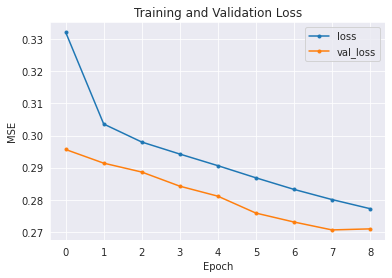

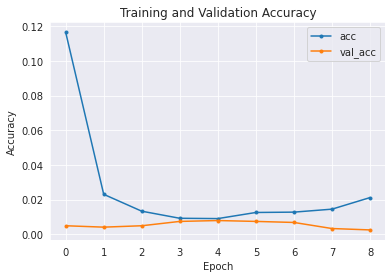

---------------------------------------------------------------------
437/437 [==============================] - 2s 5ms/step - loss: 0.2827 - acc: 0.0063
---------------------------------------------------------------------
TRAIN RESULTS: [0.281229168176651, 0.007264528889209032]
TEST RESULTS: [0.2827199101448059, 0.006298761814832687]
---------------------------------------------------------------------
---------------------------------------------------------------------
CLASSIFICATION REPORT
---------------------------------------------------------------------
               precision    recall  f1-score   support

         lane       0.96      1.00      0.98     13354
        rider       0.00      0.00      0.00       701
 traffic sign       0.82      1.00      0.90     11456
          bus       0.00      0.00      0.00      1817
        truck       0.00      0.00      0.00      3841
drivable area       0.95      1.00      0.98     13305
        motor       0.00      0.00      0.00

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


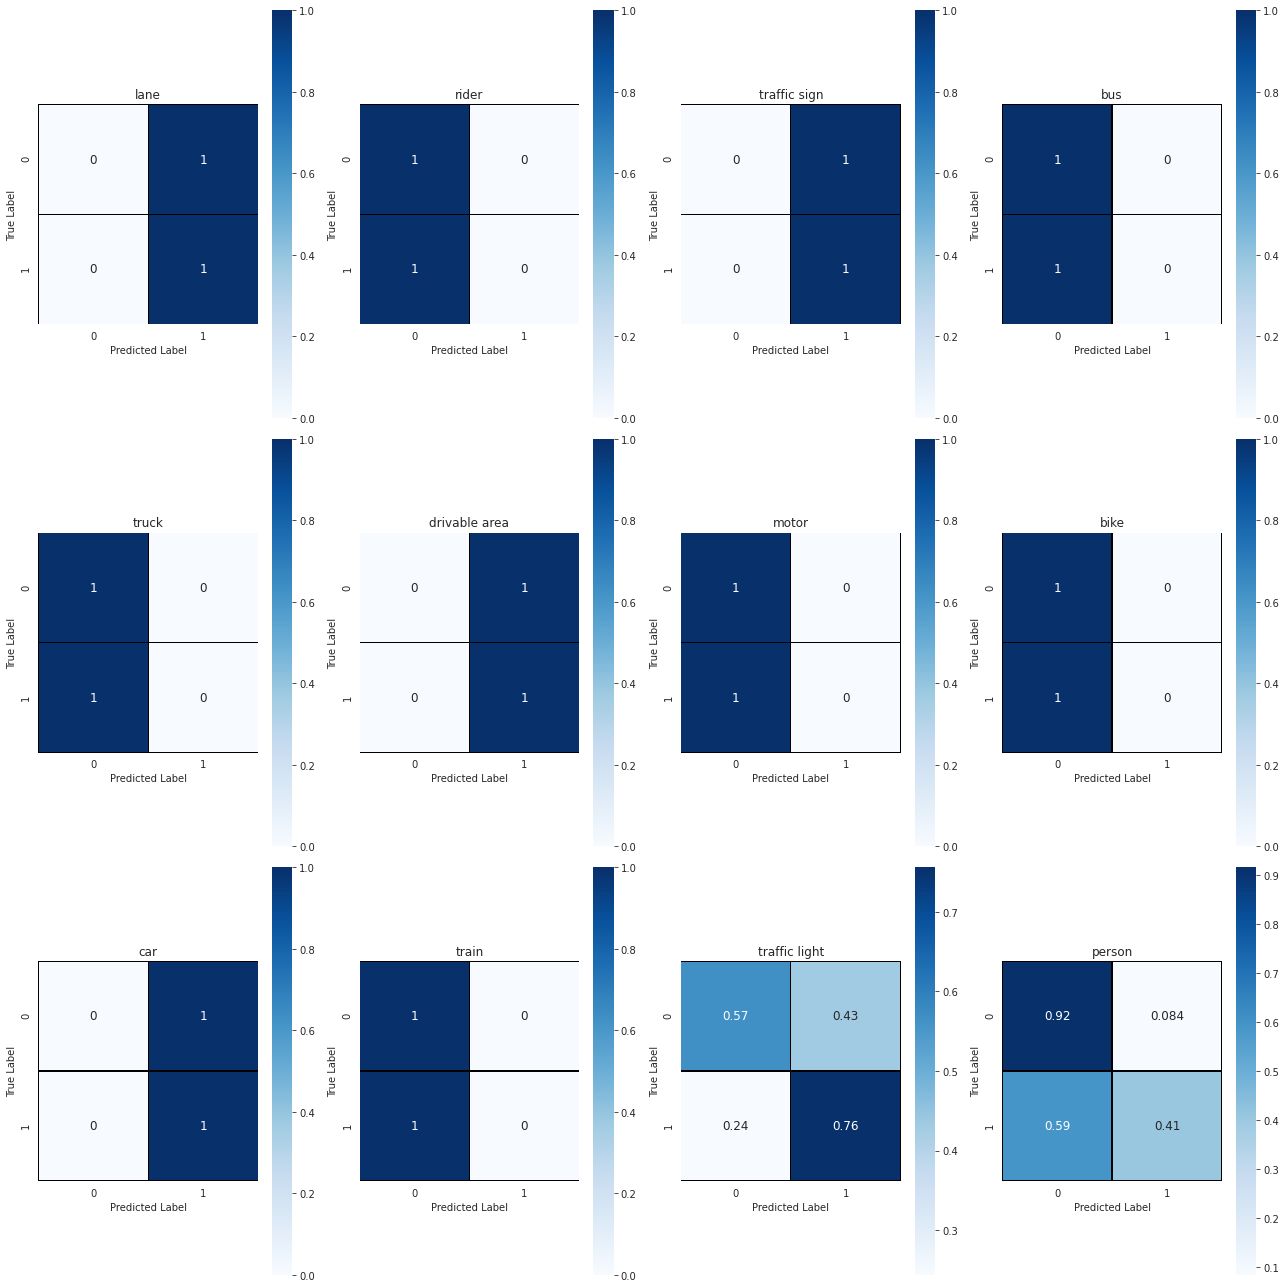

---------------------------------------------------------------------
HAMMING LOSS:  0.11724286
ACCURACY:  0.8827571421861649
---------------------------------------------------------------------


In [71]:
#model_report function to retrieve metrics
model_report(final_model, final_model_history, train_images, train_labels_, test_images, test_labels_, column_labels= target_list)

### Observations: 

> * this model stopped at epoch 6 (depending on the run) to prevent over fitting 
* the best metric to measure our model is the Hamming Loss; which is .1109(depending on the run); the amount of wrong labels predicted to the total number of labels; which in turn gives an accuracy of .8891
* the next metric to measure our model is given by the accuracy on the test validation set: approximately .006 (depending on the run), this is an extremely low score and may be a metric we choose to ignore.
* the loss for validation set (around .2645) is roughly the same as the loss for the train set (around .2698), signs of not overfitting 

In [72]:
#creating path to save model 
cnn_path = '/gdrive/My Drive/Image Classification Models/Trained Models/weights.09-0.71.hdf5'
cnn_path
#save model 
#final_model.save(cnn_path)

'/gdrive/My Drive/Image Classification Models/Trained Models/weights.09-0.71.hdf5'

In [73]:
#loading best saved model 
from tensorflow.keras.models import load_model
final_loaded_model = load_model(cnn_path)

# Pretrained Models

For this model, we will use a pretrained model InceptionResNetV2 from Keras 

## InceptionResNetV2

For this pretrained model, the input and output have been set to the parameters that met out requirements. The base of this pretrained model is what we have added to make this tranfer learning successful. 

In [74]:
#importing model 
from tensorflow.keras.applications import InceptionResNetV2

In [75]:
#instantiate model 
inception_base = InceptionResNetV2(include_top=False, weights='imagenet', 
                              input_shape=(train_images.shape[1],train_images.shape[2],3), pooling='max')
inception_base.summary

219062272/219055592 [==============================] - 2s 0us/step


<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x7f68a62d9be0>>

In [76]:
inception_model = Sequential()

#base model
inception_model.add(inception_base)

#output layer  
inception_model.add(layers.Flatten())
inception_model.add(layers.Dense(128, activation='relu'))
inception_model.add(layers.Dense(64, activation='relu'))
inception_model.add(layers.Dense(12, activation='sigmoid'))

#compile model
inception_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

inception_model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 1536)              54336736  
_________________________________________________________________
flatten_2 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               196736    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 12)                780       
Total params: 54,542,508
Trainable params: 54,481,964
Non-trainable params: 60,544
_________________________________________________________________


In [77]:
#fit the model
#this cell takes 11 mins to run 
inception_history = inception_model.fit(train_images,
                            train_labels_,
                            epochs=30,
                            batch_size = 64,
                            callbacks = callbacks,
                            validation_data=(val_images, val_labels_))

Epoch 1/30
874/874 [==============================] - 156s 156ms/step - loss: 0.2968 - acc: 0.0659 - val_loss: 16.3400 - val_acc: 0.9323

Epoch 00001: val_acc improved from 0.18865 to 0.93235, saving model to /gdrive/My Drive/Image Classification Models/weights.01-0.93.hdf5
Epoch 2/30
874/874 [==============================] - 133s 152ms/step - loss: 0.2832 - acc: 0.0328 - val_loss: 0.2698 - val_acc: 0.0585

Epoch 00002: val_acc did not improve from 0.93235
Epoch 3/30
874/874 [==============================] - 133s 152ms/step - loss: 0.2661 - acc: 0.1079 - val_loss: 0.2814 - val_acc: 0.1367

Epoch 00003: val_acc did not improve from 0.93235
Epoch 4/30
874/874 [==============================] - 133s 152ms/step - loss: 0.2590 - acc: 0.1785 - val_loss: 0.2582 - val_acc: 0.3544

Epoch 00004: val_acc did not improve from 0.93235
Epoch 5/30
874/874 [==============================] - 133s 152ms/step - loss: 0.2580 - acc: 0.1850 - val_loss: 0.2620 - val_acc: 0.1909
Restoring model weights from

## Model Report 

,loss,acc,val_loss,val_acc
0,0.278790,0.073540,16.339985,0.932346
1,0.278312,0.042997,0.269829,0.058547
2,0.265398,0.123891,0.281392,0.136709
3,0.259178,0.175995,0.258190,0.354383
4,0.259501,0.183403,0.261967,0.190853


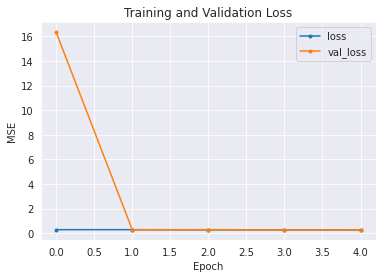

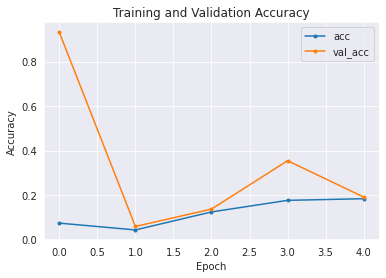

---------------------------------------------------------------------
437/437 [==============================] - 16s 37ms/step - loss: 16.3538 - acc: 0.9351
---------------------------------------------------------------------
TRAIN RESULTS: [16.609159469604492, 0.9318458437919617]
TEST RESULTS: [16.35381507873535, 0.93507981300354]
---------------------------------------------------------------------
---------------------------------------------------------------------
CLASSIFICATION REPORT
---------------------------------------------------------------------
               precision    recall  f1-score   support

         lane       0.96      1.00      0.98     13354
        rider       0.00      0.00      0.00       701
 traffic sign       0.82      1.00      0.90     11456
          bus       0.00      0.00      0.00      1817
        truck       0.00      0.00      0.00      3841
drivable area       0.95      1.00      0.98     13305
        motor       0.00      0.00      0.00   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


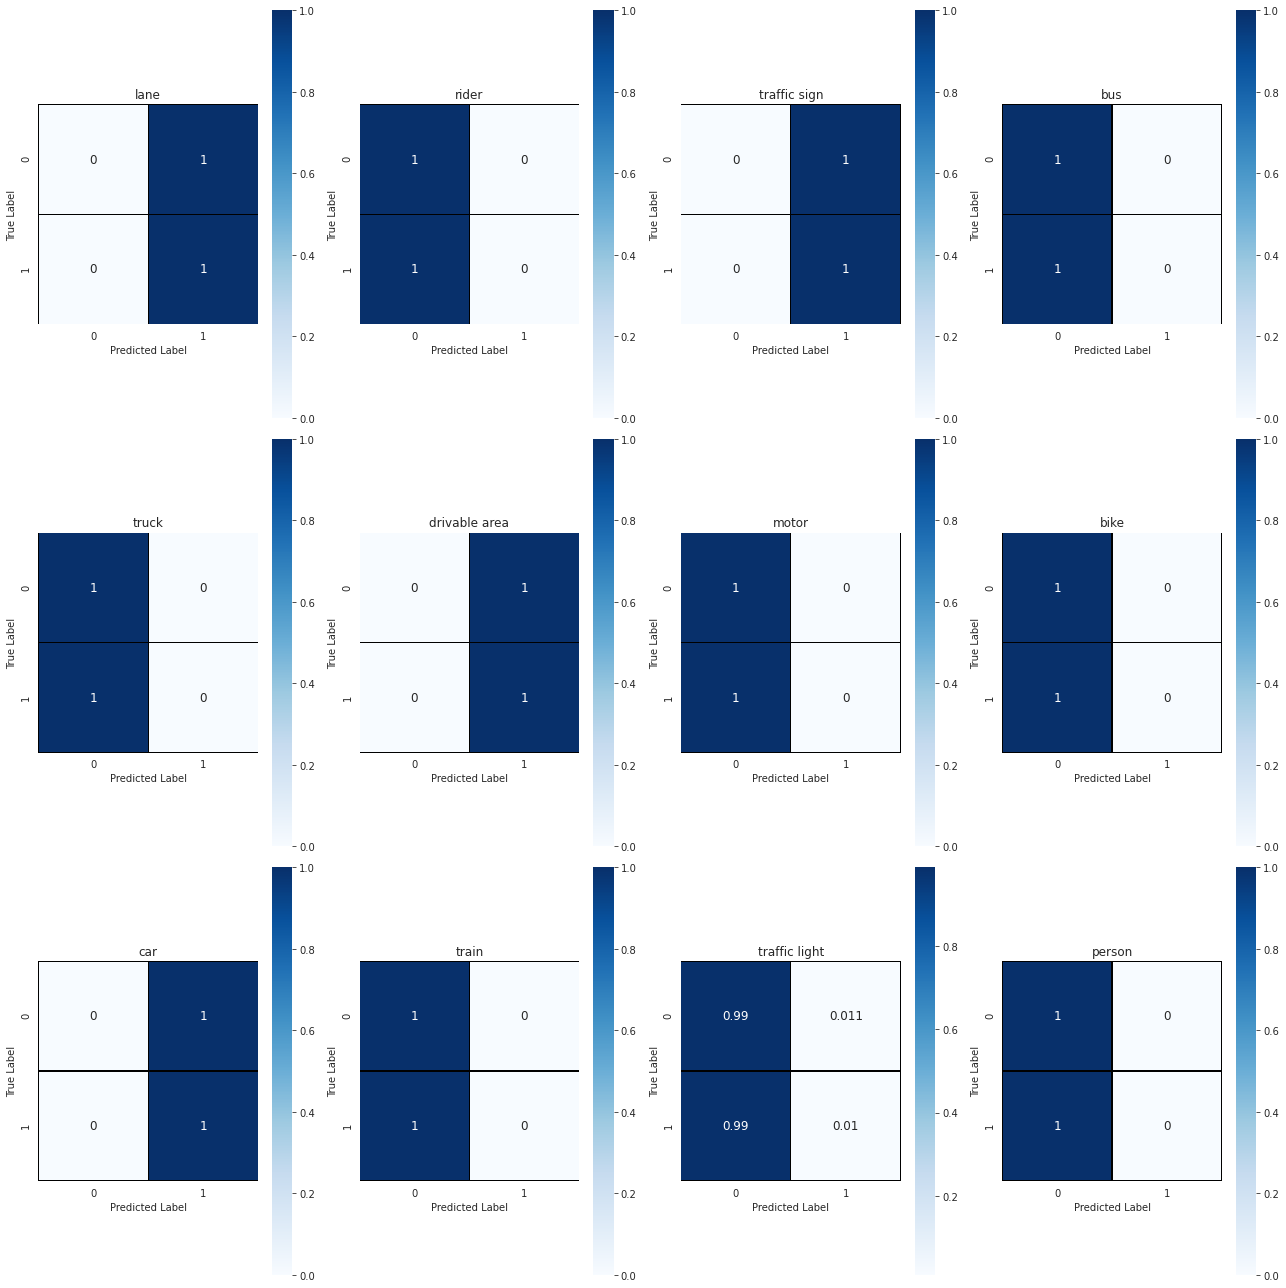

---------------------------------------------------------------------
HAMMING LOSS:  0.14338034
ACCURACY:  0.856619656085968
---------------------------------------------------------------------


In [78]:
#model_report function to retrieve metrics
model_report(inception_model, inception_history, train_images, train_labels_,
             test_images, test_labels_, column_labels= target_list)

## Observations: 

> * stopped at epoch 7 (depending on the run) to prevent overfitting 
* the best metric to measure our model is the Hamming Loss; which is .1434(depending on the run); the amount of wrong labels predicted to the total number of labels; which in turn gives an accuracy of .8566
* the next metric to measure our model is given by the accuracy on the test validation set: approximately .9351 (depending on the run)
* Very interesting! Out of all our models, we have been receiving very low accuracy scores and this one was very high. The hamming score was the highest out of all of our models
* the loss for validation set (around .271) is slightly higher than the loss for the train set (around .275), no signs of overfitting  


>**Based on the results from our models, our tuned CNN model slightly outperformed our pretrained InceptionResNetV2 model. Both models returned a Hamming Loss Score of roughly 11-13% (depending on the run), both models showed no signs of overfitting.  CNN model had a test accuracy of roughly .006% (which was the lowest out of all the runs, usually around 10%) compared to the pretrained model returning a test accuracy score of roughly 93%. This was also an anomaly, usually we received around 10%. The metrics are interesting here, let's give each model a test run**

# Interpretation



## Final Model vs Inception: Test 1

Image
-----------------


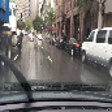

-----------------


,Model Prediction,True Labels
lane,1.0,1
rider,0.0,0
traffic sign,1.0,1
bus,0.0,0
truck,0.0,1
drivable area,1.0,1
motor,0.0,0
bike,0.0,0
car,1.0,1
train,0.0,0


In [95]:
#processing image through final model, comparing prediction vs true labels  
pred_vs_true(12999,final_model)

Image
-----------------


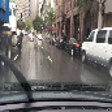

-----------------


,Model Prediction,True Labels
lane,1.0,1
rider,0.0,0
traffic sign,1.0,1
bus,0.0,0
truck,0.0,1
drivable area,1.0,1
motor,0.0,0
bike,0.0,0
car,1.0,1
train,0.0,0


In [96]:
#processing image through inception_model, comparing prediction vs true labels  
pred_vs_true(12999,inception_model)

>Observations: 
* The final model did not predict 'truck' and incorrectly predicted 'traffic light'. The model got 10/12 labels correct. 
* The inception model did not predict 'truck'. The model got 11/12 labels correct.

## Final Model vs Inception: Test 2

Image
-----------------


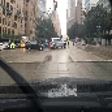

-----------------


,Model Prediction,True Labels
lane,1.0,1
rider,0.0,0
traffic sign,1.0,1
bus,0.0,1
truck,0.0,1
drivable area,1.0,1
motor,0.0,1
bike,0.0,0
car,1.0,1
train,0.0,0


In [98]:
#processing image through final model, comparing prediction vs true labels  
pred_vs_true(1, final_model)

Image
-----------------


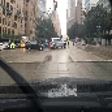

-----------------


,Model Prediction,True Labels
lane,1.0,1
rider,0.0,0
traffic sign,1.0,1
bus,0.0,1
truck,0.0,1
drivable area,1.0,1
motor,0.0,1
bike,0.0,0
car,1.0,1
train,0.0,0


In [99]:
#processing image through inception_model, comparing prediction vs true labels  
pred_vs_true(1,inception_model)

>Observations: 
* The final model did not predict 'bus', 'truck', 'motor' or 'person'. 8 of 12 labels predicted correctly. 
* The inception model did not predict 'bus', 'truck', 'motor', 'traffic light' or 'person' leaving the model being correct on 7/12 labels. 
* Both models did not predict the same labels except 'traffic light'. This could be because those same labels are on the lower side of occurrences in the training set. The pretrained model could be confusing 'traffic light' and 'traffic sign'. 

## Final Model vs Inception: Test 3

Image
-----------------


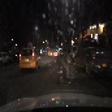

-----------------


,Model Prediction,True Labels
lane,1.0,1
rider,0.0,0
traffic sign,1.0,1
bus,0.0,0
truck,0.0,1
drivable area,1.0,1
motor,0.0,0
bike,0.0,0
car,1.0,1
train,0.0,0


In [83]:
#processing image through final model, comparing prediction vs true labels 
pred_vs_true(6999, final_model)

Image
-----------------


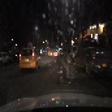

-----------------


,Model Prediction,True Labels
lane,1.0,1
rider,0.0,0
traffic sign,1.0,1
bus,0.0,0
truck,0.0,1
drivable area,1.0,1
motor,0.0,0
bike,0.0,0
car,1.0,1
train,0.0,0


In [84]:
#processing image through inception_model, comparing prediction vs true labels  
pred_vs_true(6999,inception_model)

>Observations: 
* The final model did not predict 'truck'. The model was 11/12 on this round.
* The inception model did not predict 'truck
 or 'traffic light'.  10/12 on this round. It has a hard time predicting 'traffic light'. 


## Image Activation

Let's evaluate the CNN model we created and visually see what the model is catching through the iteration process. 

In [85]:
#path to train_folder directory  
os.listdir(train_folder)

['6fc54df6-331acb3a.jpg',
 '189e3034-ffa5e600.jpg',
 '149d37b6-9e457a59.jpg',
 '2a472b31-a1c33160.jpg',
 '9b25dbe0-4e50a1c7.jpg',
 '94783e9a-3b1780dc.jpg',
 '5b75e043-4224a6e8.jpg',
 '8a126f7b-0f68996c.jpg',
 '6561de80-a31290e9.jpg',
 '4b5a4080-aedd1e5d.jpg',
 '9f68b0a6-0e841fc8.jpg',
 '32e9754a-9b98c826.jpg',
 '8c35d373-b2519bb0.jpg',
 '9b0581c4-dd55e5ac.jpg',
 '0877376c-3ec788af.jpg',
 '54bd3654-affc932e.jpg',
 '64d0c2b8-226a23c9.jpg',
 '09e2ff07-3674f025.jpg',
 '257b3085-fd346fc9.jpg',
 'b085f3ec-9b43b5c3.jpg',
 'a44d7cba-2e4da855.jpg',
 '843ec757-06831e22.jpg',
 '34398e88-124baa7a.jpg',
 '8ceca92a-600d3410.jpg',
 '6e4c2c7e-74dd3c7b.jpg',
 'ac8034a3-4efb5914.jpg',
 'ac8fbda7-07ae4f58.jpg',
 '870e4678-c220faad.jpg',
 '90742501-b4d913a6.jpg',
 '34b55e78-3417c352.jpg',
 '38d45fa5-e4e7a056.jpg',
 '670d968c-e54f12d5.jpg',
 '5ed60649-ad60907c.jpg',
 '86693189-74525cc2.jpg',
 '919a795a-ff42c3e5.jpg',
 '3ebd1501-7fbec7b1.jpg',
 'a1efc30f-22cf14b5.jpg',
 'abfc562d-811b069a.jpg',
 '83722b4f-a

In [86]:
#randomly selected an image from above and created an image path
img_path = train_folder + '/6b367893-d4d0ab6c.jpg'
img_path

'bdd100k/images/100k/train/6b367893-d4d0ab6c.jpg'

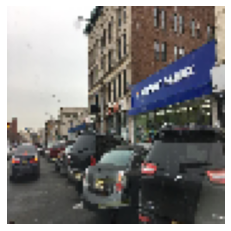

In [87]:
#loading image with desired target size 
img = image.load_img(img_path, target_size= (86, 86))
plt.axis('off')
plt.imshow(img)
plt.show()

(1, 86, 86, 3)


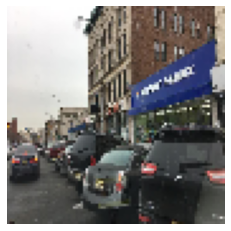

In [88]:
#transform to a tensor and visualize
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis= 0)
img_tensor /= 255.

#check Shape
print(img_tensor.shape)

#preview Image
plt.axis('off')
plt.imshow(img_tensor[0])
plt.show()

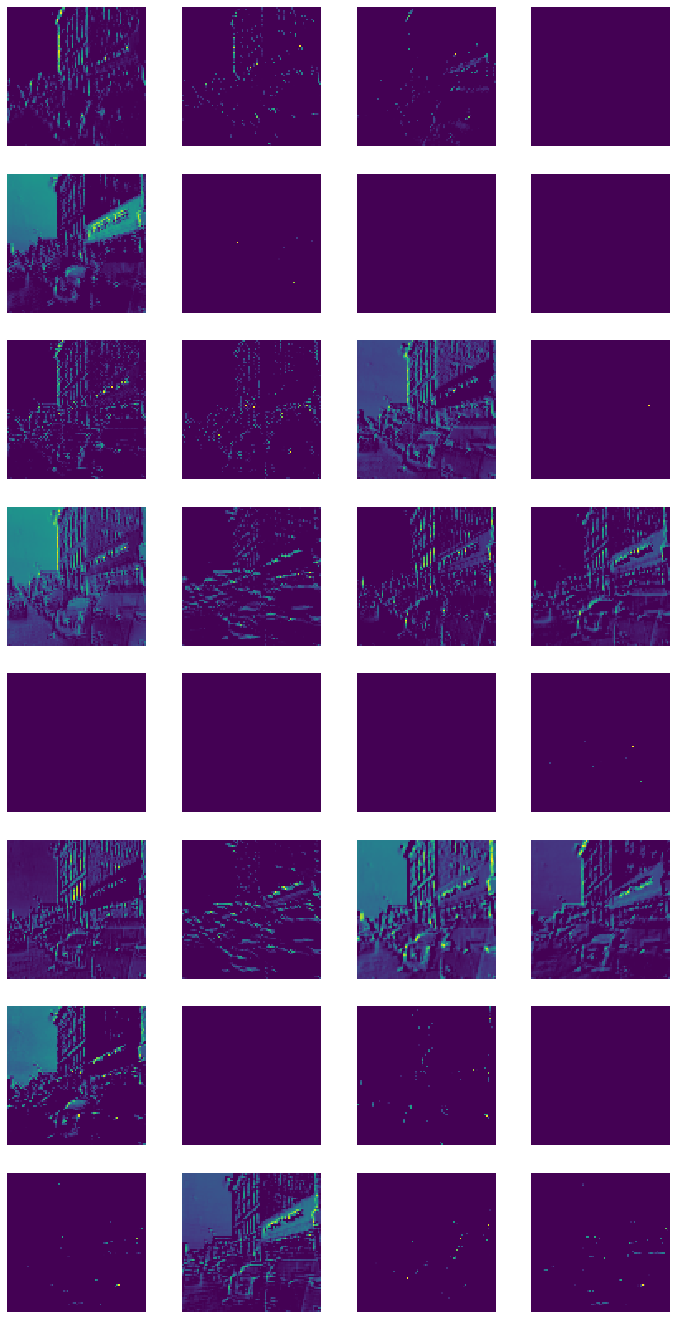

In [89]:
#getting model layer output
layer_outputs_single = [layer.output for layer in final_model.layers[:8]]

#make a model to display feature maps
activation_model_single = models.Model(inputs = final_model.input, outputs = layer_outputs_single)

#array for the activation layer
activations_single = activation_model_single.predict(img_tensor)
first_layer_activation = activations_single[0]

#visualize iterations
fig, axes = plt.subplots(8, 4, figsize=(12,24))

for i in range(32):
    row = i//4
    column = i%4
    ax = axes[row, column]
    ax.axis('off')
    first_layer_activation = activations_single[0]
    ax.matshow(first_layer_activation[0, :, :, i], cmap='viridis')

# Conclusion 

* The final model followed a Conv2D-Conv2D-Pool pattern with four layers. Input layer, hidden layer 1, hidden layer 2 and output layer. 

* Image Sizes were set at 86 x 86, this was the largest we could set the images at without my computer crashing.

* The final model produced a hamming score of 11% which equals to a 89% accuracy rate. Remember, the hamming score loss function takes the number of wrongly predicted labels divided by total number of labels.

* The InceptionResNetV2 model produced a hamming score of 14% which equals to 86% accuracy. 

* The training set had over 17,000 images that contained 4 different labels, which was the most. 

* The training set had 13 images that contained 11 labels, no images had all 12 labels at once. 

* The labels with the least occurrence(labels 0-5) in the training set, the final model had a hard time predicting. 

* The labels with the most occurrence (labels 6-11) in the training set, the final model was able to predict most of the time. Both models seemed to get traffic sign and traffic light confused. 

* Both models did not predict the same labels for one of the images. This could be because those same labels are on the lower side of occurrences in the training set. The pretrained model has a hard time predicting 'traffic light', missed on it in a few tests. 




In [90]:
df_stats

,Labels,Occurrence
0,train,105
1,motor,2284
2,rider,3586
3,bike,4343
4,bus,8993
5,truck,18890
6,person,22076
7,traffic light,39237
8,traffic sign,57154
9,lane,66533


## Recommendations 

**Based on the analysis, we can offer the following recommendations:**

1. Since this model is not predicting all objects correctly, car companies can use this model as a driver assistant to help alert the driver of what is seen on the road. Essentially a second pair of eyes which would be great when driving in either the dark, day or rush hour. This will help mitigate the occurrence of car accidents. 

2. This model can be used as a starting point for companies that are creating a self driving electric car. 

3. If you are building your own multi-label image classification model; I recommend the following; 
  * Use a convolutional neural network.
  * A dataset that possesses geographic, environmental, and weather diversity, which is useful for training models that are less likely to be surprised by new conditions.



## Limitations and Next Steps

**To improve our project, the following steps have been outlined**

1. Data augmentation for labels that occured the least. This will improve the model and help classify objects that are rarely seen.

2. Increase image size. The larger the image (while keeping its sharpness) will improve the model performance.

3. Adding object localization. In this project, we completed object detection (image classification) which is to classify and detect all objects in a image.  The next step is object localization which is locating where that object is and drawing a bounding box. 

4. Explore other frameworks such as LSTM or YOLO that can be used for multi-label classification problems 